**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

* [4. Split data](#Split)

* [5. Outliers Treatment](#outliers)
    * [5.1. Manual Limitation](#AutomaticLimitation)
    * [5.2. IQR](#IQR)
    * [5.3. 2-dimensional outliers](#2dim_outliers)

* [6. Missing values Treatment](#missings)

* [7. Scale the data](#scale)

* [8. Feature Engeneering](#FeatureEngeneering)

* [9. Redo outliers check](#redo-outliers)

* [10. Feature Selection](#FeatureSelection)
    * [10.1. Univariate Analysis](#univariate)
    * [10.2. Filter Methods](#filter)
        * [10.2.1 Correlation Matrix](#correlation)
        * [10.2.2 Chi-Squared](#chi-squared)
        * [10.2.3 ANOVA](#ANOVA)
    * [10.3. Wrapper methods](#warpper)
        * [10.3.1 RFE](#RFE)
        * [10.3.2 Forward Sequential Feature Selection](#forward)
        * [10.3.3 Backward Sequential Feature Selection](#backward)
    * [10.4. Embedded methods](#embedded)
        * [10.4.1 Ridge Regression](#ridge)
        * [10.4.2 Decision Tree for feature importance](#decision_tree_sel_feature)
        
* [11. Check for an imbalanced dataset](#imbalanced)
    * [11.1.  Adaptive Syntetic Oversampling](#Adaptive)
    
* [12. Modeling](#Modeling)
    * [12.1 Decision trees](#DT)
    * [12.2 Neural Network](#NN)
    * [12.3 Logistic Regression](#LR)
    * [12.4 KNN](#KNN)
    * [12.5 Support Vector Machine](#SVM)
    * [12.6 Ensemble models](#ENSEMBLE)
        * [12.6.1 Random Forest](#RF)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats
import datetime as dt

from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
#from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from collections import OrderedDict

from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install imblearn

In [5]:
!pip install metrics

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 841 kB 6.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17815 sha256=809a7256b91160eb796939560230adf01092f4a6a2298b112871c3ae66bc3560
  Stored in directory: /Users/leo/Library/Caches/pip/wheels/4f/55/f5/ca7e08a3ac083b918070e9d148ecafba8172b24611712ad678
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24234 sha256=20205a17116464769254add8fcf485a1cfad05eb2f9606e0aa0135253b383693
  Stored in directory: /Users/leo/Library/Caches/pip/wheels/7c/bb/0d/525cedbe683d79ee6c9185fb7e3c27d30a43141ecf89ccb46b
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are insta

In [3]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [4]:
df.head()

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  102863333  21-Mar-20                 0                  0.0          0   
1  103117814  20-May-20                 0                  0.0          0   
2  103201891   4-Dec-20                 0                  0.0          0   
3  103226087  22-Dec-20                 0                  0.0          0   
4  103234445  24-Nov-20                 0                  0.0          2   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0              3           64.0000                      0.0000   
1           0.0             23          684.5000                      0.0217   
2           0.0              8           95.0000                      0.0250   
3           0.0              9          608.7500                      0.0000   
4         386.0             36         1609.9397                      0.0000   

   GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  Browser  \
0                    0.0667                     0.0000   MacOSX        2   
1                    0.0449                     0.0000  Windows        2   
2                    0.0583                     0.0000  Windows        4   
3                    0.0250                    42.4225  Windows        2   
4                    0.0093                    12.5033  Windows        2   

          Country  Type_of_Traffic Type_of_Visitor  Buy  
0        Portugal                1        Returner    0  
1          France                6        Returner    0  
2           Italy                1        Returner    0  
3  United Kingdom                2        Returner    1  
4           Spain                3        Returner    1

In [5]:
df.describe()

Access_ID  AccountMng_Pages  AccountMng_Duration    FAQ_Pages  \
count  9.999000e+03       9999.000000          9999.000000  9999.000000   
mean   4.519728e+08          2.324232            81.205854     0.508051   
std    2.024990e+08          3.340676           179.715545     1.279390   
min    1.028633e+08          0.000000             0.000000     0.000000   
25%    2.731950e+08          0.000000             0.000000     0.000000   
50%    4.536169e+08          1.000000             7.500000     0.000000   
75%    6.259756e+08          4.000000            92.208350     0.000000   
max    7.984440e+08         27.000000          3398.750000    24.000000   

       FAQ_Duration  Product_Pages  Product_Duration  \
count   9999.000000    9999.000000       9999.000000   
mean      34.559101      31.685869       1199.769430   
std      139.796989      44.550277       1958.276304   
min        0.000000       0.000000          0.000000   
25%        0.000000       7.000000        183.562500   
50%        0.000000      18.000000        599.000000   
75%        0.000000      38.000000       1470.270800   
max     2549.375000     705.000000      63973.522200   

       GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
count                 9999.000000               9999.000000   
mean                     0.022305                  0.043181   
std                      0.048776                  0.048845   
min                      0.000000                  0.000000   
25%                      0.000000                  0.014300   
50%                      0.003200                  0.025100   
75%                      0.016800                  0.050000   
max                      0.200000                  0.200000   

       GoogleAnalytics_PageValue      Browser  Type_of_Traffic          Buy  
count                9999.000000  9999.000000      9999.000000  9999.000000  
mean                    5.963120     2.352535         3.957496     0.155216  
std                    18.753626     1.715698         3.675159     0.362128  
min                     0.000000     1.000000         1.000000     0.000000  
25%                     0.000000     2.000000         2.000000     0.000000  
50%                     0.000000     2.000000         2.000000     0.000000  
75%                     0.000000     2.000000         4.000000     0.000000  
max                   361.763700    13.000000        15.000000     1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [7]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [8]:
#techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [9]:
df = df.set_index(["Access_ID"])
test = test.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [10]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")
test["Date"] = pd.to_datetime(test["Date"], format = "%d-%b-%y")

In [11]:
# Checking datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
dtype: object

In [12]:
def conversion_type(df):

    df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
    df['AccountMng_Duration']=df['AccountMng_Duration'].astype(pd.Float32Dtype())
    df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())
    df['FAQ_Duration']=df['FAQ_Duration'].astype(pd.Float32Dtype())
    df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
    df['Product_Duration']=df['Product_Duration'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_BounceRate']=df['GoogleAnalytics_BounceRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_ExitRate']=df['GoogleAnalytics_ExitRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_PageValue']=df['GoogleAnalytics_PageValue'].astype(pd.Float32Dtype())
    df['OS']=df['OS'].astype(pd.StringDtype())
    df['Browser']=df['Browser'].astype(pd.Int32Dtype())
    df['Country']=df['Country'].astype(pd.StringDtype())
    df['Type_of_Traffic']=df['Type_of_Traffic'].astype(pd.Int32Dtype())
    df['Type_of_Visitor']=df['Type_of_Visitor'].astype(pd.StringDtype())
    


In [13]:
conversion_type(df)
conversion_type(test)
df['Buy']=df['Buy'].astype(pd.Int32Dtype())

In [14]:
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       Int32
AccountMng_Duration                  Float32
FAQ_Pages                              Int32
FAQ_Duration                         Float32
Product_Pages                          Int32
Product_Duration                     Float32
GoogleAnalytics_BounceRate           Float32
GoogleAnalytics_ExitRate             Float32
GoogleAnalytics_PageValue            Float32
OS                                    string
Browser                                Int32
Country                               string
Type_of_Traffic                        Int32
Type_of_Visitor                       string
Buy                                    Int32
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [15]:
# confirming that the first and last day of every month is correct
df['day']=df['Date'].dt.day
df.groupby(df['Date'].dt.month).agg(['min', 'max'])['day']

min  max
Date          
2       1   29
3       1   31
5       1   31
6       1   30
7       1   31
8       1   31
9       1   30
10      1   31
11      1   30
12      1   31

In [16]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] 
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
Access_ID                                                                
104650368 2020-11-05                 1                  0.0          0   
107375098 2020-08-07                 1                  0.0          3   
113677580 2020-11-28                 1                  0.0          0   
115628954 2020-05-23                 2                  0.0          0   
116343256 2020-10-11                 1                  0.0          1   
...              ...               ...                  ...        ...   
776479996 2020-06-26                 1                  0.0          0   
776570163 2020-05-25                 1                  0.0          0   
778884123 2020-05-26                 1                  0.0          0   
786784027 2020-05-17                 1                  0.0          1   
792640200 2020-05-30                 1                  0.0          0   

           FAQ_Duration  Product_Pages  Product_Duration  \
Access_ID                                                  
104650368           0.0             14          1125.875   
107375098          69.0             15           352.875   
113677580           0.0             39       1159.541748   
115628954           0.0              0               0.0   
116343256     66.400002             14        668.316711   
...                 ...            ...               ...   
776479996           0.0             12        277.450012   
776570163           0.0             27             889.0   
778884123           0.0             90       5621.599121   
786784027         313.0              6             135.5   
792640200           0.0              4             334.0   

           GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
Access_ID                                                         
104650368                         0.0                    0.0429   
107375098                         0.0                    0.0556   
113677580                      0.0013                    0.0313   
115628954                         0.2                       0.2   
116343256                      0.0143                    0.0286   
...                               ...                       ...   
776479996                        0.06                      0.09   
776570163                      0.0214                    0.0679   
778884123                         0.0                    0.0131   
786784027                      0.0286                    0.0857   
792640200                        0.08                     0.116   

           GoogleAnalytics_PageValue       OS  Browser   Country  \
Access_ID                                                          
104650368                        0.0  Windows        2  Portugal   
107375098                        0.0  Windows        2     Spain   
113677580                        0.0  Windows        2     Other   
115628954                        0.0  Android        2  Portugal   
116343256                  44.893501      iOS        2  Portugal   
...                              ...      ...      ...       ...   
776479996                        0.0   MacOSX        2     Spain   
776570163                        0.0      iOS        1     Spain   
778884123                      2.099  Windows        2     Italy   
786784027                        0.0  Windows        2     Italy   
792640200                        0.0  Android        1     Spain   

           Type_of_Traffic Type_of_Visitor  Buy  day  
Access_ID                                             
104650368                2        Returner    0    5  
107375098                2        Returner    0    7  
113677580                2        Returner    1   28  
115628954                6        Returner    0   23  
116343256               15        Returner    1   11  
...                    ...             ...  ...  ...  
776479996               13        Returner    0   26  
776570163           

In [17]:
df=df[~(
    
        ((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
        ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
        ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
        ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
        ((df['Product_Pages']==0) & (df['Product_Pages']>0))|
        ((df['Product_Pages']>0) & (df['Product_Pages']==0))|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|

        (df['GoogleAnalytics_ExitRate']>1)|
        (df['GoogleAnalytics_ExitRate']<0)|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|
        (df['Date']>dt.datetime(2020,12,31))|
        (df['Date']<dt.datetime(2020,1,31))
    
        )]

In [18]:
df[df['Date']>dt.datetime(2020,1,31)]

Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
Access_ID                                                                
102863333 2020-03-21                 0                  0.0          0   
103117814 2020-05-20                 0                  0.0          0   
103201891 2020-12-04                 0                  0.0          0   
103226087 2020-12-22                 0                  0.0          0   
103234445 2020-11-24                 0                  0.0          2   
...              ...               ...                  ...        ...   
798279589 2020-05-08                 3                159.0          2   
798314158 2020-07-17                 6           175.100006          0   
798339820 2020-03-23                 0                  0.0          0   
798371242 2020-05-16                 0                  0.0          0   
798444008 2020-11-20                 0                  0.0          0   

           FAQ_Duration  Product_Pages  Product_Duration  \
Access_ID                                                  
102863333           0.0              3              64.0   
103117814           0.0             23             684.5   
103201891           0.0              8              95.0   
103226087           0.0              9            608.75   
103234445         386.0             36       1609.939697   
...                 ...            ...               ...   
798279589          55.5             23          1100.125   
798314158           0.0              3              27.6   
798339820           0.0             27             644.0   
798371242           0.0             53             715.5   
798444008           0.0             23       1919.550049   

           GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
Access_ID                                                         
102863333                         0.0                    0.0667   
103117814                      0.0217                    0.0449   
103201891                       0.025                    0.0583   
103226087                         0.0                     0.025   
103234445                         0.0                    0.0093   
...                               ...                       ...   
798279589                         0.0                    0.0111   
798314158                         0.0                    0.0111   
798339820                      0.0077                    0.0519   
798371242                      0.0226                    0.0363   
798444008                      0.0087                    0.0319   

           GoogleAnalytics_PageValue       OS  Browser         Country  \
Access_ID                                                                
102863333                        0.0   MacOSX        2        Portugal   
103117814                        0.0  Windows        2          France   
103201891                        0.0  Windows        4           Italy   
103226087                  42.422501  Windows        2  United Kingdom   
103234445                    12.5033  Windows        2           Spain   
...                              ...      ...      ...             ...   
798279589                        0.0   MacOSX        2          Brazil   
798314158                        0.0  Windows       10           Spain   
798339820                        0.0   MacOSX        2          France   
798371242                        0.0  Windows        2           Italy   
798444008                     4.2803  Windows        2          Brazil   

           Type_of_Traffic Type_of_Visitor  Buy  day  
Access_ID                                             
102863333                1        Returner    0   21  
103117814                6        Returner    0   20  
103201891                1        Returner    0    4  
103226087                2        Returner    1   22  
103234445                3        Returner    1   24  
...                    ...             ...  ...  ...

In [19]:
# percentage of records removed due to inconsistency
(9999-9710)/9999

0.028902890289028902

<hr>
<a class="anchor" id="Split">
    
# 2. Split the data
    
</a>

In [20]:
X = df.drop("Buy", axis = 1)
y = df["Buy"]

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y, train_size = 0.70,random_state = 0, shuffle = True)

### Separate Numerical from Categorical 

In [22]:
# X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
# X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
# #For validation
# X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
# X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [23]:
non_num_feat=['Date', 'OS', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'day','Browser']
X_train_num = X_train.drop(columns=non_num_feat)
X_train_cat=X_train[non_num_feat]

X_val_num = X_val.drop(columns=non_num_feat)
X_val_cat=X_val[non_num_feat]

<hr>
<a class="anchor" id="outliers">
    
# 2. Outliers Treatment
    
</a>

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped ___ records (1.3%).

<hr>
<a class="anchor" id="AutomaticLimitation">
    
## Manual Limitation
    
</a>

Text(0.5, 0.98, "Numeric Variables' Histograms")

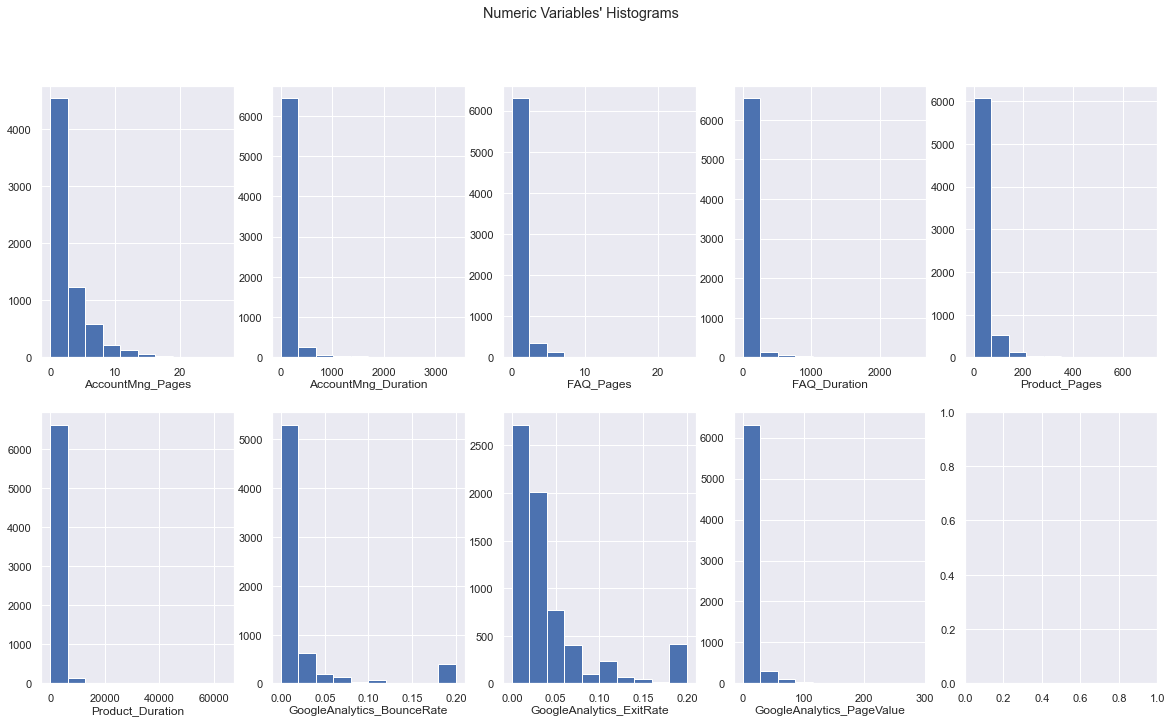

In [24]:
# All Numeric Variables' Histograms in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), (X_train_num.columns.tolist())): # Notice the zip() function and flatten() method
    ax.hist(X_train_num[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig("teste.png")

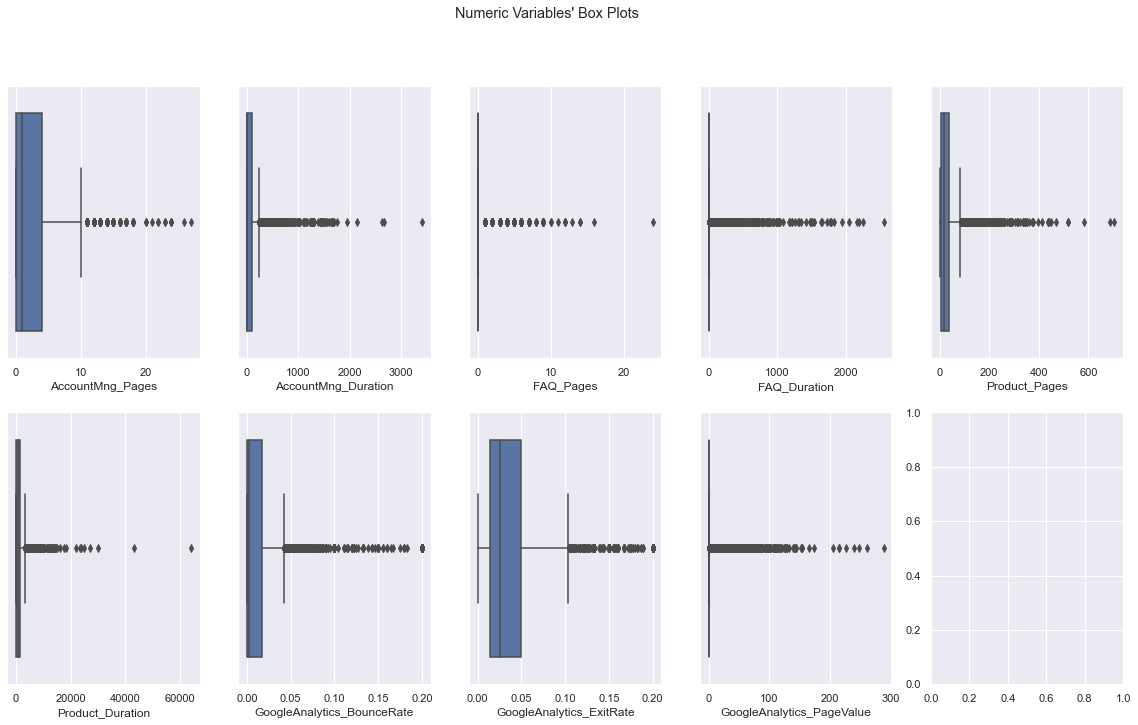

In [25]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [26]:
(6797-6708)/6797 

0.013094012064145948

In [27]:
len(X_train)

6797

In [28]:
filters1 = (
         (X_train['AccountMng_Pages']<=19)
         &
         (X_train['AccountMng_Duration']<=2000)
         &
         (X_train['FAQ_Pages']<=6)
         &
         (X_train['FAQ_Duration']<=1100)
         &
         (X_train['Product_Pages']<=400)
         &
         (X_train['Product_Duration']<=15000)
         &
         (X_train['GoogleAnalytics_BounceRate']<=0.20)
         &
         (X_train['GoogleAnalytics_ExitRate']<=0.20)
         &
         (X_train['GoogleAnalytics_PageValue']<=165)
         )

teste=X_train[filters1]
teste

Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
Access_ID                                                                
746917175 2020-09-19                 4            77.099998          0   
565616559 2020-12-16                 0                  0.0          4   
276412217 2020-12-30                 7           131.833298          0   
361837847 2020-05-20                 0                  0.0          0   
568629484 2020-03-20                 0                  0.0          0   
...              ...               ...                  ...        ...   
789752052 2020-07-02                 5           109.599998          1   
581081929 2020-03-22                 0                  0.0          0   
283517225 2020-12-25                 5                 97.0          0   
524663666 2020-05-25                 0                  0.0          0   
349625811 2020-05-14                 7                157.5          1   

           FAQ_Duration  Product_Pages  Product_Duration  \
Access_ID                                                  
746917175           0.0              4         41.700001   
565616559           8.0             66       1514.836304   
276412217           0.0             63       2074.611084   
361837847           0.0              2             121.0   
568629484           0.0             21            1003.0   
...                 ...            ...               ...   
789752052           3.0             29       1980.266724   
581081929           0.0             12        169.300003   
283517225           0.0             53       3372.748291   
524663666           0.0             27       1058.023804   
349625811          23.0             42       3503.024902   

           GoogleAnalytics_BounceRate  GoogleAnalytics_ExitRate  \
Access_ID                                                         
746917175                         0.0                    0.0286   
565616559                      0.0229                    0.0449   
276412217                      0.0108                      0.02   
361837847                         0.0                      0.05   
568629484                         0.0                    0.0083   
...                               ...                       ...   
789752052                      0.0061                    0.0263   
581081929                         0.0                    0.0167   
283517225                      0.0038                    0.0025   
524663666                      0.0269                    0.0369   
349625811                      0.0051                    0.0182   

           GoogleAnalytics_PageValue       OS  Browser   Country  \
Access_ID                                                          
746917175                        0.0  Windows        2    Brazil   
565616559                        0.0  Windows        2     Other   
276412217                        0.0   MacOSX        2     Spain   
361837847                        0.0   MacOSX        2  Portugal   
568629484                        0.0  Windows        4  Portugal   
...                              ...      ...      ...       ...   
789752052                        0.0  Windows        2  Portugal   
581081929                        0.0  Windows        2     Spain   
283517225                        0.0  Windows        2     Italy   
524663666                        0.0  Windows        2  Portugal   
349625811                  21.764799  Windows        2  Portugal   

           Type_of_Traffic Type_of_Visitor  day  
Access_ID                                        
746917175                6        Returner   19  
565616559                2        Returner   16  
276412217               10        Returner   30  
361837847                3        Returner   20  
568629484                1        Returner   20  
...                    ...             ...  ...  
789752052                4        Returner    2  
581081929                2        Returner   22  
283517225      

In [29]:
#def manual_filter(df):
def filter_outlier(df):
    filters1 = (
         (df['AccountMng_Pages']<=19)
         &
         (df['AccountMng_Duration']<=2000)
         &
         (df['FAQ_Pages']<=6)
         &
         (df['FAQ_Duration']<=1100)
         &
         (df['Product_Pages']<=400)
         &
         (df['Product_Duration']<=15000)
         &
         (df['GoogleAnalytics_BounceRate']<=0.20)
         &
         (df['GoogleAnalytics_ExitRate']<=0.20)
         &
         (df['GoogleAnalytics_PageValue']<=165)
         )
    return df[filters1],df[~filters1].index

In [30]:
# X_CV=filter_outlier(X)[0]
# index_out_X_CV=filter_outlier(X)[1].tolist()
# y_CV=pd.DataFrame(y)
# y_CV=y_CV[~y_CV.index.isin(index_out_X_CV)]

In [31]:
index_out_train=filter_outlier(X_train)[1].tolist()

In [32]:
index_out_val=filter_outlier(X_val)[1].tolist()

In [33]:
X_val_no_out=filter_outlier(X_val)[0]

In [34]:
X_train_no_out=filter_outlier(X_train)[0]

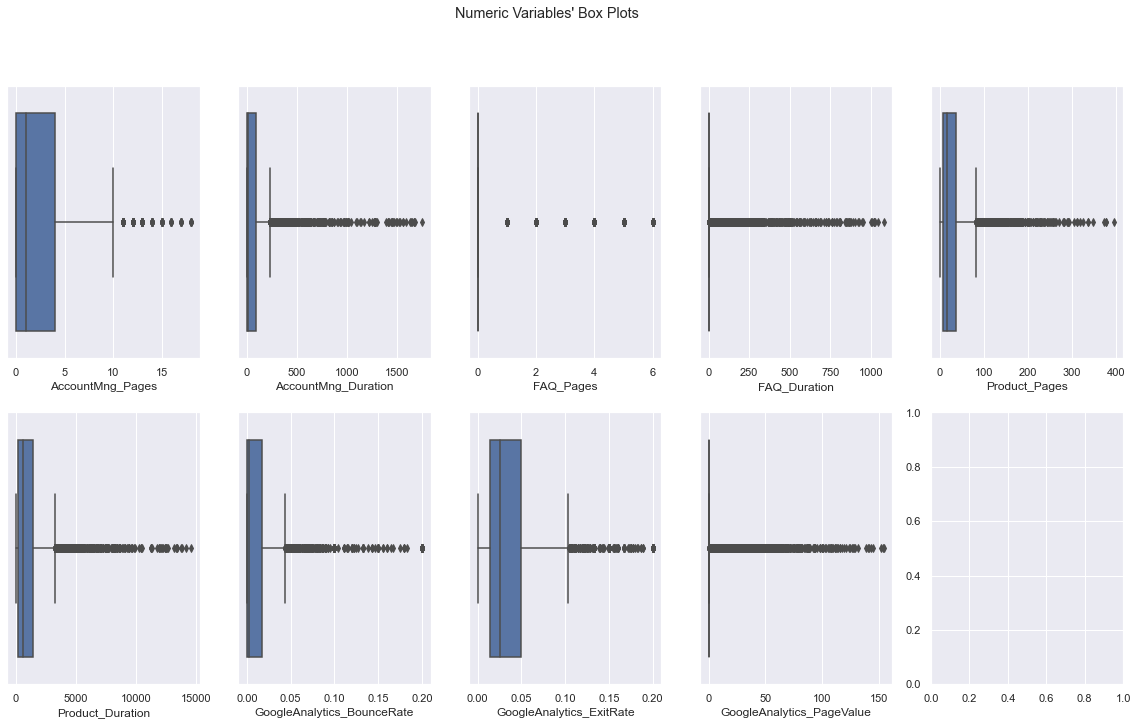

In [35]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_no_out.drop(columns=non_num_feat, axis=1).columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), teste.drop(columns=non_num_feat, axis=1).columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=(X_train_no_out[feat]), ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [36]:
# remove outliers records from y_train
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df[~y_train_df.index.isin(index_out_train)]

In [37]:
# remove outliers records from y_val
y_val_df=pd.DataFrame(y_val)
y_val_df=y_val_df[~y_val_df.index.isin(index_out_val)]

In [38]:
X_train_no_out_num = X_train_no_out.drop(columns=non_num_feat)
X_train_no_out_cat=X_train_no_out[non_num_feat]

<hr>
<a class="anchor" id="2dim_outliers">
    
## Multi-dimentional outliers
    
</a>

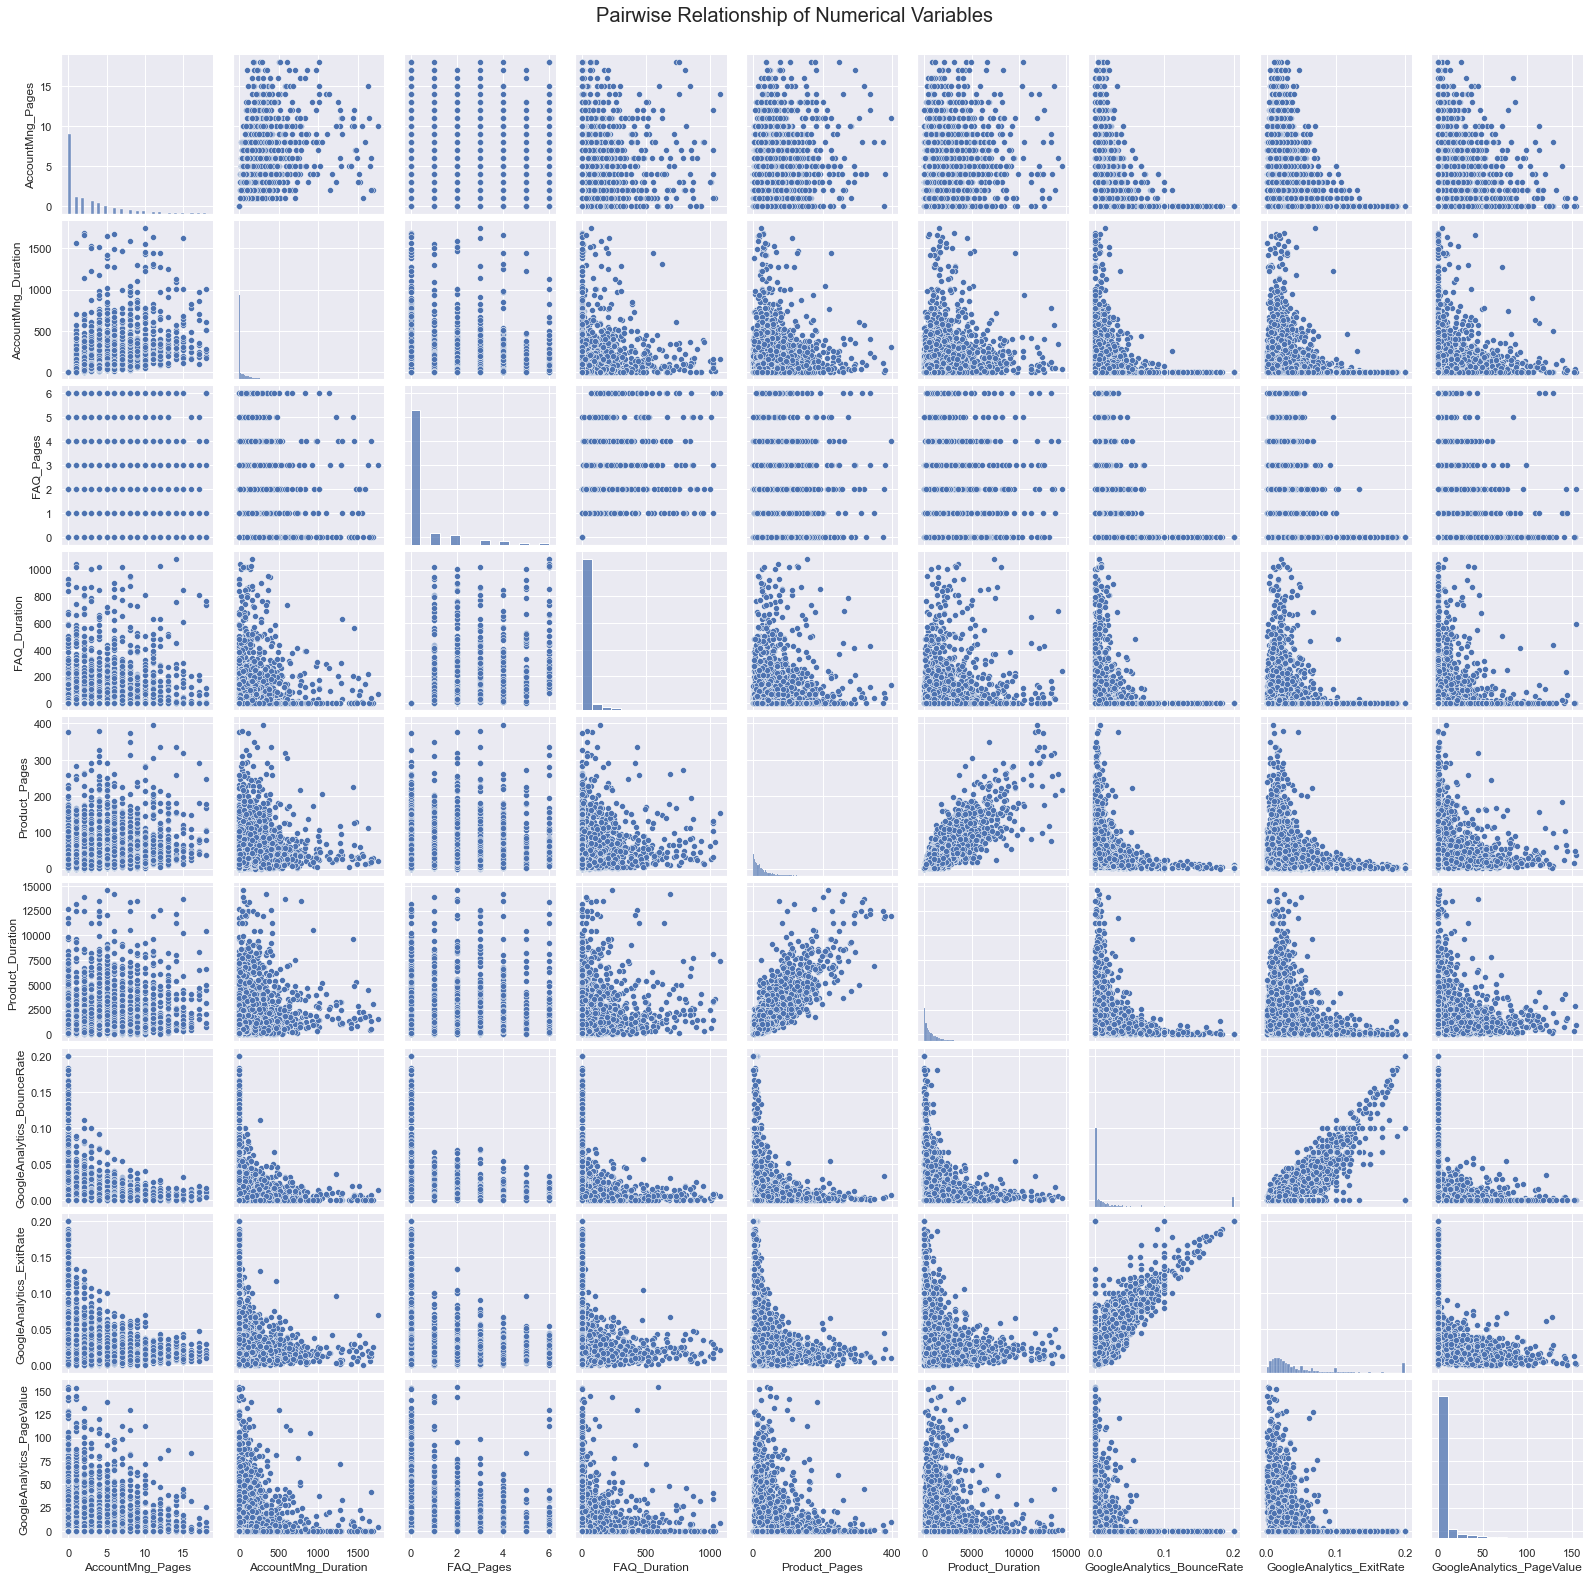

In [39]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(X_train_no_out_num, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

<hr>
<a class="anchor" id="FeatureEngeneering">
    
# Feature Engineering
    
</a>

In [40]:
def feat_eng(df):

    df['month']=df['Date'].dt.month
    df['avg_duration_account'] = np.where(
        df['AccountMng_Pages']==0, 0,np.divide(df['AccountMng_Duration'],df['AccountMng_Pages'])) 

    df['avg_duration_FAQ'] = np.where(
        df['FAQ_Pages']==0, 0,np.divide(df['FAQ_Duration'],df['FAQ_Pages'])) 

    df['avg_duration_product'] = np.where(
        df['Product_Pages']==0, 0,np.divide(df['Product_Duration'],df['Product_Pages'])) 
   

    df['log_AccountMng_Duration']=np.log10(df['AccountMng_Duration']+1)
    df['log_AccountMng_Pages']=np.log10(df['AccountMng_Pages']+1)
    df['log_FAQ_Duration']=np.log10(df['FAQ_Duration']+1)
    df['log_FAQ_Pages']=np.log10(df['FAQ_Pages']+1)
    df['log_Product_Duration']=np.log10(df['Product_Duration']+1)
    df['log_Product_Pages']=np.log10(df['Product_Pages']+1)
    df['log_BounceRate']=np.log10(df['GoogleAnalytics_BounceRate']+1)
    df['log_ExitRate']=np.log10(df['GoogleAnalytics_ExitRate']+1)
    df['log_PageValue']=np.log10(df['GoogleAnalytics_PageValue']+1)
    df['during_covid']=np.where(df['month']<=3,0,1) 

In [41]:
feat_eng(X_train_no_out)
feat_eng(X_val_no_out)
feat_eng(test)

#feat_eng(X_CV)


## One Hot_encoding

#### Train dataset

In [42]:
ohc_feat_list = ['Browser','Country','OS','Type_of_Visitor','Type_of_Traffic']

In [43]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(X_train_no_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_train = pd.DataFrame(ohc_feat, index=X_train_no_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_train.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany',
       'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS',
       'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3',
       'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11',
       'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [44]:
ohc_X_train.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [45]:
X_train_eng = X_train_no_out.join(ohc_X_train)

In [46]:
X_train_eng.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser11', 'browser12',
       'browser13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Oth

#### Test dataset

In [47]:
ohc_feat_test = ohc.fit_transform(test[ohc_feat_list])
ohc_feat_test_names = ohc.get_feature_names()
ohc_X_test = pd.DataFrame(ohc_feat_test, index = test.index, columns = ohc_feat_test_names)  # Why the index=df_ohc.index?
ohc_X_test.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9',
       'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France',
       'x1_Germany', 'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain',
       'x1_Switzerland', 'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS',
       'x2_Fedora', 'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows',
       'x2_iOS', 'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2',
       'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10',
       'x4_11', 'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [48]:
ohc_X_test.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [49]:
X_test_eng = test.join(ohc_X_test)

In [50]:
X_test_eng.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'month', 'avg_duration_account',
       'avg_duration_FAQ', 'avg_duration_product', 'log_AccountMng_Duration',
       'log_AccountMng_Pages', 'log_FAQ_Duration', 'log_FAQ_Pages',
       'log_Product_Duration', 'log_Product_Pages', 'log_BounceRate',
       'log_ExitRate', 'log_PageValue', 'during_covid', 'browser1', 'browser2',
       'browser3', 'browser4', 'browser5', 'browser6', 'browser7', 'browser8',
       'browser9', 'browser10', 'browser11', 'browser12', 'browser13',
       'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy', 'x1_Other',
       'x1_Portugal', 'x1_Spain', 'x1_Switzerland', 'x1_United Kingdom',
       'x2_Android', 'x2_Chrome OS', 'x2_Fedora', 'x2_MacOSX', 'x2_Other

#### Validation dataset

In [51]:
ohc_feat_val = ohc.fit_transform(X_val_no_out[ohc_feat_list])
ohc_feat_val_names = ohc.get_feature_names()
ohc_X_val = pd.DataFrame(ohc_feat_val, index = X_val_no_out.index, columns = ohc_feat_val_names)  # Why the index=df_ohc.index?
ohc_X_val.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_MacOSX',
       'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS', 'x3_New_Access',
       'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5',
       'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11', 'x4_12', 'x4_13',
       'x4_14', 'x4_15'],
      dtype='object')

In [52]:
ohc_X_val.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [53]:
X_val_eng = X_val_no_out.join(ohc_X_val)

In [54]:
binary_list=ohc_X_train.columns.to_list()+['during_covid']

In [55]:
non_num_feat1=non_num_feat+binary_list+['month']

In [56]:
X_train_eng_num = X_train_eng.drop(columns=non_num_feat1)

In [57]:
X_train_eng_num.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue'],
      dtype='object')

In [58]:
non_num_feat_alter=non_num_feat1.copy()
non_num_feat_alter.remove('browser11')
non_num_feat_alter.remove('x2_Fedora')

In [59]:
X_val_eng_num = X_val_eng.drop(columns=non_num_feat_alter,axis=1)

<hr>
<a class="anchor" id="scale">
    
# Scaling Data
    
</a>

In [60]:
scaler = MinMaxScaler().fit(X_train_eng_num)
X_train_eng_num_scaled_min = scaler.transform(X_train_eng_num) 

# Convert the array to a pandas dataframe
X_train_eng[X_train_eng_num.columns] = pd.DataFrame(X_train_eng_num_scaled_min, columns = X_train_eng_num.columns).set_index(X_train_eng_num.index)

X_train_eng.describe().T

count      mean       std  min       25%       50%  \
AccountMng_Pages     6708.0  0.123708  0.175042  0.0  0.000000  0.055556   
AccountMng_Duration  6708.0  0.044413  0.093789  0.0  0.000000  0.004569   
FAQ_Pages            6708.0  0.073395  0.180070  0.0  0.000000  0.000000   
FAQ_Duration         6708.0  0.025269  0.091353  0.0  0.000000  0.000000   
Product_Pages        6708.0  0.075535  0.097142  0.0  0.017632  0.044081   
...                     ...       ...       ...  ...       ...       ...   
traffic11            6708.0  0.020572  0.141959  0.0  0.000000  0.000000   
traffic12            6708.0  0.003429  0.058459  0.0  0.000000  0.000000   
traffic13            6708.0  0.060823  0.239023  0.0  0.000000  0.000000   
traffic14            6708.0  0.002236  0.047238  0.0  0.000000  0.000000   
traffic15            6708.0  0.016100  0.125870  0.0  0.000000  0.000000   

                          75%  max  
AccountMng_Pages     0.222222  1.0  
AccountMng_Duration  0.051969  1.0  
FAQ_Pages            0.000000  1.0  
FAQ_Duration         0.000000  1.0  
Product_Pages        0.093199  1.0  
...                       ...  ...  
traffic11            0.000000  1.0  
traffic12            0.000000  1.0  
traffic13            0.000000  1.0  
traffic14            0.000000  1.0  
traffic15            0.000000  1.0  

[73 rows x 8 columns]

In [61]:
X_val_num_scaled = scaler.transform(X_val_eng_num)
X_val_eng[X_val_eng_num.columns] = pd.DataFrame(X_val_num_scaled, columns = X_val_eng_num.columns).set_index(X_val_eng_num.index)
X_val_eng.describe().T

count      mean       std  min       25%       50%  \
AccountMng_Pages     2862.0  0.125126  0.181819  0.0  0.000000  0.055556   
AccountMng_Duration  2862.0  0.043070  0.089494  0.0  0.000000  0.002855   
FAQ_Pages            2862.0  0.067028  0.165060  0.0  0.000000  0.000000   
FAQ_Duration         2862.0  0.023581  0.086747  0.0  0.000000  0.000000   
Product_Pages        2862.0  0.074413  0.095533  0.0  0.017632  0.042821   
...                     ...       ...       ...  ...       ...       ...   
traffic11            2862.0  0.020615  0.142116  0.0  0.000000  0.000000   
traffic12            2862.0  0.006289  0.079069  0.0  0.000000  0.000000   
traffic13            2862.0  0.058700  0.235104  0.0  0.000000  0.000000   
traffic14            2862.0  0.003494  0.059018  0.0  0.000000  0.000000   
traffic15            2862.0  0.014326  0.118850  0.0  0.000000  0.000000   

                          75%       max  
AccountMng_Pages     0.222222  1.055556  
AccountMng_Duration  0.050220  1.111335  
FAQ_Pages            0.000000  1.000000  
FAQ_Duration         0.000000  0.993672  
Product_Pages        0.090680  0.871537  
...                       ...       ...  
traffic11            0.000000  1.000000  
traffic12            0.000000  1.000000  
traffic13            0.000000  1.000000  
traffic14            0.000000  1.000000  
traffic15            0.000000  1.000000  

[71 rows x 8 columns]

In [62]:
X_test_eng.describe().T

count       mean         std  min  25%    50%  \
AccountMng_Pages     2300.0   2.290000    3.252300  0.0  0.0   1.00   
AccountMng_Duration  2300.0  79.780937  164.447601  0.0  0.0   8.55   
FAQ_Pages            2300.0   0.486522    1.234311  0.0  0.0   0.00   
FAQ_Duration         2300.0  34.266831  145.500687  0.0  0.0   0.00   
Product_Pages        2300.0  31.928696   44.150226  0.0  8.0  18.00   
...                     ...        ...         ...  ...  ...    ...   
traffic11            2300.0   0.017391    0.130753  0.0  0.0   0.00   
traffic12            2300.0   0.002609    0.051020  0.0  0.0   0.00   
traffic13            2300.0   0.061739    0.240733  0.0  0.0   0.00   
traffic14            2300.0   0.002609    0.051020  0.0  0.0   0.00   
traffic15            2300.0   0.017826    0.132348  0.0  0.0   0.00   

                           75%          max  
AccountMng_Pages      4.000000    23.000000  
AccountMng_Duration  97.850006  2720.500000  
FAQ_Pages             0.000000    12.000000  
FAQ_Duration          0.000000  2252.033203  
Product_Pages        38.000000   534.000000  
...                        ...          ...  
traffic11             0.000000     1.000000  
traffic12             0.000000     1.000000  
traffic13             0.000000     1.000000  
traffic14             0.000000     1.000000  
traffic15             0.000000     1.000000  

[70 rows x 8 columns]

In [63]:
metric_feat=X_train_eng_num.columns.to_list()

In [64]:
X_test_eng_scaled = scaler.transform(X_test_eng[metric_feat])
X_test_eng[metric_feat] = pd.DataFrame(X_test_eng_scaled, columns = X_test_eng[metric_feat].columns).set_index(X_test_eng[metric_feat].index)
X_test_eng.describe().T

count      mean       std  min       25%       50%  \
AccountMng_Pages     2300.0  0.127222  0.180683  0.0  0.000000  0.055556   
AccountMng_Duration  2300.0  0.045562  0.093914  0.0  0.000000  0.004883   
FAQ_Pages            2300.0  0.081087  0.205719  0.0  0.000000  0.000000   
FAQ_Duration         2300.0  0.031733  0.134744  0.0  0.000000  0.000000   
Product_Pages        2300.0  0.080425  0.111210  0.0  0.020151  0.045340   
...                     ...       ...       ...  ...       ...       ...   
traffic11            2300.0  0.017391  0.130753  0.0  0.000000  0.000000   
traffic12            2300.0  0.002609  0.051020  0.0  0.000000  0.000000   
traffic13            2300.0  0.061739  0.240733  0.0  0.000000  0.000000   
traffic14            2300.0  0.002609  0.051020  0.0  0.000000  0.000000   
traffic15            2300.0  0.017826  0.132348  0.0  0.000000  0.000000   

                          75%       max  
AccountMng_Pages     0.222222  1.277778  
AccountMng_Duration  0.055881  1.553641  
FAQ_Pages            0.000000  2.000000  
FAQ_Duration         0.000000  2.085538  
Product_Pages        0.095718  1.345088  
...                       ...       ...  
traffic11            0.000000  1.000000  
traffic12            0.000000  1.000000  
traffic13            0.000000  1.000000  
traffic14            0.000000  1.000000  
traffic15            0.000000  1.000000  

[73 rows x 8 columns]

In [65]:
# from sklearn.preprocessing import RobustScaler

# transformer = RobustScaler().fit(X_train_no_out_num)

# X_train_num_robust= pd.DataFrame(transformer.fit_transform(X_train_no_out_num))
# X_train_num_robust.columns=X_train_no_out_num.columns.values

In [66]:
# X_val_num_robust= pd.DataFrame(transformer.fit_transform(X_val_no_out_num))


# X_val_num_robust.columns=X_val_no_out_num.columns.values

In [67]:
# X_train_num_robust.describe().T

<hr>
<a class="anchor" id="redo-outliers">
    
# Redo outliers check
    
</a>

In [68]:
y_train_no_out=y_train_df

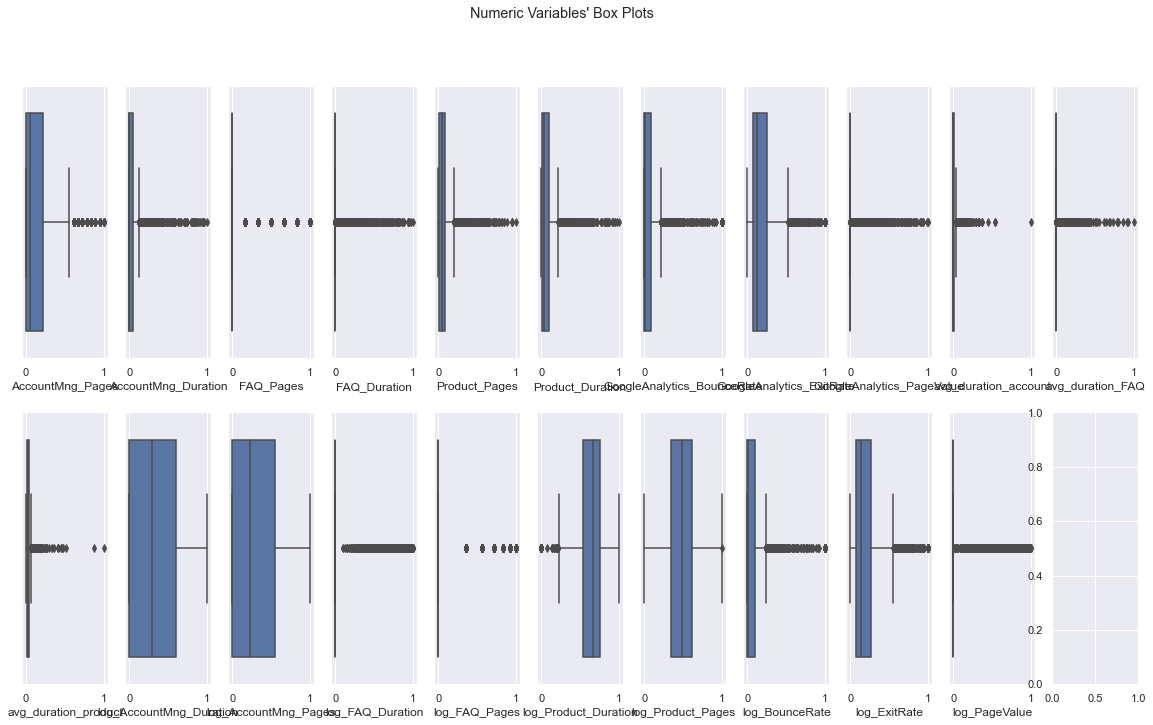

In [69]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_eng[metric_feat].columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_eng[metric_feat].columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train_eng[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


<a class="anchor" id="FeatureSelection">
    
# Feature Selection
    
</a>


<a class="anchor" id="univariate">
    
## Univariate analysis
    
</a>

In [70]:
X_train_eng[metric_feat].var()

AccountMng_Pages              0.030640
AccountMng_Duration           0.008796
FAQ_Pages                     0.032425
FAQ_Duration                  0.008345
Product_Pages                 0.009437
Product_Duration              0.011718
GoogleAnalytics_BounceRate    0.060598
GoogleAnalytics_ExitRate      0.060483
GoogleAnalytics_PageValue     0.011142
avg_duration_account          0.000877
avg_duration_FAQ              0.002770
avg_duration_product          0.001104
log_AccountMng_Duration       0.098894
log_AccountMng_Pages          0.083957
log_FAQ_Duration              0.063641
log_FAQ_Pages                 0.058318
log_Product_Duration          0.045566
log_Product_Pages             0.034333
log_BounceRate                0.061285
log_ExitRate                  0.060929
log_PageValue                 0.063437
dtype: float64

None of the variables is univariate so we don't have to drop any variable, at least according with this method

In [71]:
# https://scikit-learn.org/stable/modules/feature_selection.html 
pd.DataFrame(X_train_eng[binary_list].var())

0
browser1           0.161041
browser2           0.228472
browser3           0.007252
browser4           0.057263
browser5           0.034088
browser6           0.012513
browser7           0.004896
browser8           0.011057
browser10          0.012658
browser11          0.000447
browser12          0.001043
browser13          0.004748
x1_Brazil          0.088363
x1_France          0.083288
x1_Germany         0.034503
x1_Italy           0.058831
x1_Other           0.061170
x1_Portugal        0.235883
x1_Spain           0.157447
x1_Switzerland     0.025976
x1_United Kingdom  0.041097
x2_Android         0.167416
x2_Chrome OS       0.001637
x2_Fedora          0.000447
x2_MacOSX          0.165779
x2_Other           0.000596
x2_Ubuntu          0.006664
x2_Windows         0.249139
x2_iOS             0.036850
x3_New_Access      0.118249
x3_Other           0.006959
x3_Returner        0.123287
traffic1           0.162811
traffic2           0.213905
traffic3           0.141577
traffic4           0.082069
traffic5           0.019723
traffic6           0.033256
traffic7           0.003269
traffic8           0.025270
traffic9           0.003269
traffic10          0.033117
traffic11          0.020152
traffic12          0.003417
traffic13          0.057132
traffic14          0.002231
traffic15          0.015843
during_covid       0.143240

In [72]:
0.8*(1-0.8)

0.15999999999999998

<hr>
<a class="anchor" id="filter">
    
## Filter Methods
    
</a>

<hr>
<a class="anchor" id="correlation">
    
### Correlation Matrix
    
</a>

In [73]:
# Dataframe with the dependent and independent variables
all_train_num = X_train_eng[metric_feat].join(y_train)

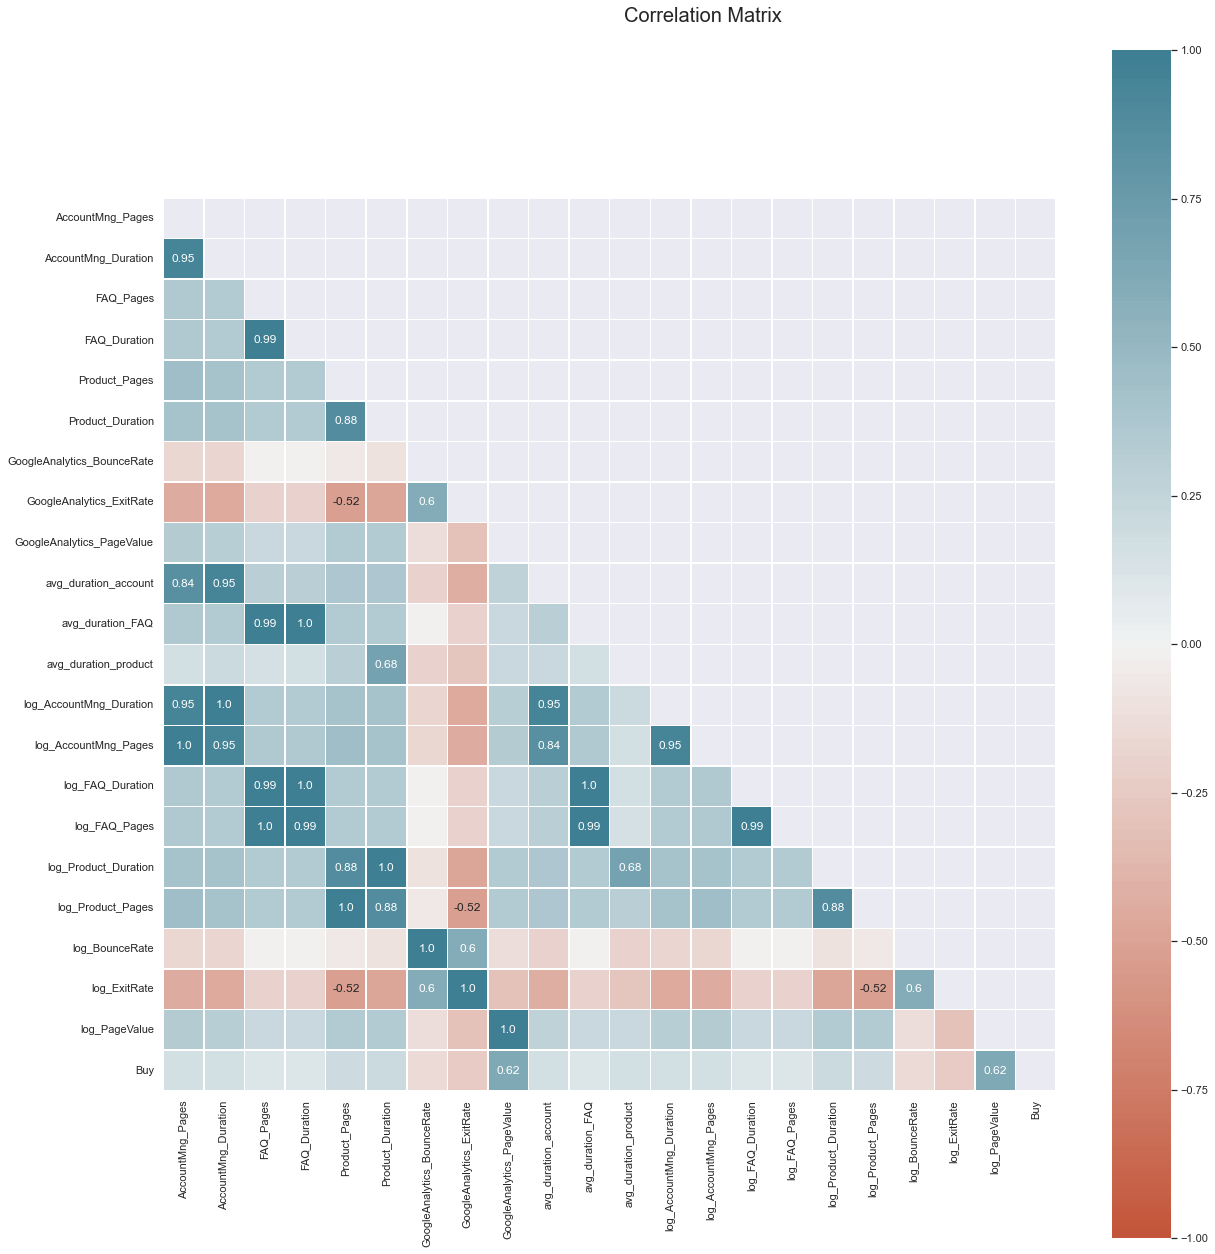

In [74]:
# # function to create a heatmat
# def cor_heatmap(cor):
#     plt.figure(figsize=(20,20))
#     cor=np.round()
#     matrix = np.triu(cor)

#     # using the upper triangle matrix as mask 
#     sns.heatmap(data = cor, annot = True, fmt='.1', mask=matrix,cmap=sns.diverging_palette(20, 220, n=200))   
#     plt.show()    

# Prepare figure
fig = plt.figure(figsize=(20, 20))

# Obtain correlation matrix. Round the values to 2 decimal cases.
corr = np.round(all_train_num.corr(method="spearman"),2)
matrix = np.triu(corr)
# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot,mask=matrix,cmap=sns.diverging_palette(20, 220, n=200), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

In [75]:
# cor_spearman = all_train_num.corr(method ='spearman')

In [76]:
# cor_heatmap(cor_spearman)

GoogleAnalytics_PageValue and log_PageValue are highly correlated with the target variable so we should keep them one of them since they are redundant.

- There are pairs of variables highly correlated, namely:
    - avg_duration_account vs AccountMng_Pages (0.9) <br>
    - avg_duration_account vs AccountMng_Duration (1) <br>
    - log_AccountMng_Duration vs AccountMng_Pages (0.9) <br>
    - log_FAQ_Duration vs FAQ_Pages (1) <br>
    - log_FAQ_Pages vs FAQ_Duration (1) <br>
    - log_Product_Duration vs Product_Pages (0.9) <br>
    - log_Product_Pages vs Product_Duration (0.9) <br>
    - log_BounceRate vs GoogleAnalytics_ExitRate (0.5) <br>
    - log_ExitRate vs GoogleAnalytics_BounceRate (0.9) <br>

<hr>
<a class="anchor" id="chi-squared">
    
### Chi-Squared
    
</a>

In [77]:
X_chisquare=X_train_eng[binary_list]

In [78]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [79]:
for var in X_chisquare:
    TestIndependence(X_chisquare[var],y_train_no_out, var)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

<hr>
<a class="anchor" id="ANOVA">
    
### ANOVA
    
</a>

In [80]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [81]:
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    
    X_train_fs = pd.DataFrame(fs.transform(X_train))
    
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs


In [82]:
select_features(X_train_eng[metric_feat], y_train_df)

(            0         1         2         3         4         5       6   \
 0     0.222222  0.044031  0.000000  0.000000  0.010076  0.002861  0.0000   
 1     0.000000  0.000000  0.666667  0.007409  0.166247  0.103919  0.1145   
 2     0.388889  0.075288  0.000000  0.000000  0.158690  0.142320  0.0540   
 3     0.000000  0.000000  0.000000  0.000000  0.005038  0.008301  0.0000   
 4     0.000000  0.000000  0.000000  0.000000  0.052897  0.068807  0.0000   
 ...        ...       ...       ...       ...       ...       ...     ...   
 6703  0.277778  0.062591  0.166667  0.002778  0.073048  0.135848  0.0305   
 6704  0.000000  0.000000  0.000000  0.000000  0.030227  0.011614  0.0000   
 6705  0.277778  0.055395  0.000000  0.000000  0.133501  0.231373  0.0190   
 6706  0.000000  0.000000  0.000000  0.000000  0.068010  0.072581  0.1345   
 6707  0.388889  0.089946  0.166667  0.021300  0.105793  0.240310  0.0255   
 
           7         8         9   ...        11        12        13      

In [83]:
X_train_fs, fs =select_features(X_train_eng[metric_feat], y_train_df)
dict_feat={}

for i in range(len(fs.scores_)):
    dict_feat[X_train_eng[metric_feat].columns[i]]=fs.scores_[i]
    
dict(sorted(dict_feat.items(), key=lambda item: item[1]))
 

{'avg_duration_product': 13.567982135182847,
 'avg_duration_FAQ': 30.227001126384366,
 'avg_duration_account': 33.4595220684583,
 'FAQ_Duration': 59.55531112123382,
 'AccountMng_Duration': 65.01682511233422,
 'FAQ_Pages': 65.15374376774147,
 'log_FAQ_Pages': 74.00793749172753,
 'log_FAQ_Duration': 84.82792834635447,
 'AccountMng_Pages': 140.5764764181631,
 'GoogleAnalytics_BounceRate': 161.76232765638417,
 'log_BounceRate': 166.4786802715826,
 'Product_Pages': 177.09464392905335,
 'log_AccountMng_Pages': 183.70489179788285,
 'log_AccountMng_Duration': 195.6991634583482,
 'Product_Duration': 197.86796550915474,
 'log_Product_Pages': 265.6967525787562,
 'log_Product_Duration': 277.6244126397036,
 'GoogleAnalytics_ExitRate': 299.9746123172136,
 'log_ExitRate': 310.99898544893546,
 'GoogleAnalytics_PageValue': 2623.180213898888,
 'log_PageValue': 4372.981880100837}

Feature 0: 140.576476
Feature 1: 65.016825
Feature 2: 65.153744
Feature 3: 59.555311
Feature 4: 177.094644
Feature 5: 197.867966
Feature 6: 161.762328
Feature 7: 299.974612
Feature 8: 2623.180214
Feature 9: 33.459522
Feature 10: 30.227001
Feature 11: 13.567982
Feature 12: 195.699163
Feature 13: 183.704892
Feature 14: 84.827928
Feature 15: 74.007937
Feature 16: 277.624413
Feature 17: 265.696753
Feature 18: 166.478680
Feature 19: 310.998985
Feature 20: 4372.981880


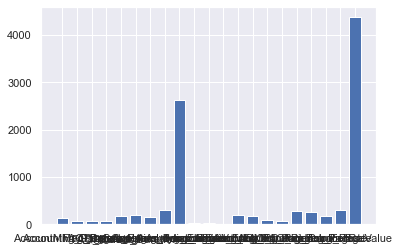

In [84]:
from matplotlib import pyplot
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in metric_feat], fs.scores_,)
pyplot.show()

<hr>
<a class="anchor" id="wrapper">
    
## Wrapper Methods
    
</a>

<hr>
<a class="anchor" id="RFE">
    
### RFE
    
</a>

Optimal number of features : 18
Max accuracy: 0.8994038748137109


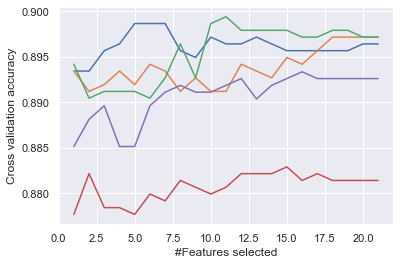

array([[0.89344262, 0.89344262, 0.89418778, 0.87770321, 0.88516033],
       [0.89344262, 0.89120715, 0.890462  , 0.88217748, 0.88814318],
       [0.89567809, 0.89195231, 0.89120715, 0.87844892, 0.8896346 ],
       [0.89642325, 0.89344262, 0.89120715, 0.87844892, 0.88516033],
       [0.89865872, 0.89195231, 0.89120715, 0.87770321, 0.88516033],
       [0.89865872, 0.89418778, 0.890462  , 0.87994034, 0.8896346 ],
       [0.89865872, 0.89344262, 0.89269747, 0.87919463, 0.89112603],
       [0.89567809, 0.89120715, 0.89642325, 0.88143177, 0.89187174],
       [0.89493294, 0.89269747, 0.89269747, 0.88068606, 0.89112603],
       [0.89716841, 0.89120715, 0.89865872, 0.87994034, 0.89112603],
       [0.89642325, 0.89120715, 0.89940387, 0.88068606, 0.89187174],
       [0.89642325, 0.89418778, 0.89791356, 0.88217748, 0.89261745],
       [0.89716841, 0.89344262, 0.89791356, 0.88217748, 0.89038031],
       [0.89642325, 0.89269747, 0.89791356, 0.88217748, 0.89187174],
       [0.89567809, 0.89493294, 0.

In [85]:
#Doing the same using RFECV and KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter


min_features_to_select = 1  
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select= min_features_to_select
)
rfecv.fit(X_train_eng[metric_feat], y_train_df)

print(f"Optimal number of features : {rfecv.n_features_}")
print(f"Max accuracy: {np.amax(rfecv.grid_scores_)}" )

# Plot features vs validation scores
plt.figure()
plt.xlabel("#Features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()
# update version
rfecv.grid_scores_

In [86]:
X_train_eng[metric_feat+binary_list].columns.to_list()

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'avg_duration_account',
 'avg_duration_FAQ',
 'avg_duration_product',
 'log_AccountMng_Duration',
 'log_AccountMng_Pages',
 'log_FAQ_Duration',
 'log_FAQ_Pages',
 'log_Product_Duration',
 'log_Product_Pages',
 'log_BounceRate',
 'log_ExitRate',
 'log_PageValue',
 'browser1',
 'browser2',
 'browser3',
 'browser4',
 'browser5',
 'browser6',
 'browser7',
 'browser8',
 'browser10',
 'browser11',
 'browser12',
 'browser13',
 'x1_Brazil',
 'x1_France',
 'x1_Germany',
 'x1_Italy',
 'x1_Other',
 'x1_Portugal',
 'x1_Spain',
 'x1_Switzerland',
 'x1_United Kingdom',
 'x2_Android',
 'x2_Chrome OS',
 'x2_Fedora',
 'x2_MacOSX',
 'x2_Other',
 'x2_Ubuntu',
 'x2_Windows',
 'x2_iOS',
 'x3_New_Access',
 'x3_Other',
 'x3_Returner',
 'traffic1',
 'traffic2',
 'traffic3',
 'traffic4',
 'traffic5',
 'traff

In [87]:
rfecv.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [88]:
#As per in class

from sklearn.feature_selection import RFE

#no of features
nof_list= [1,2,3,4,5,6,7]           
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

#RFE Support
rfe_support = []

for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(np.array(X_train_eng[metric_feat+binary_list]), y_train_df.astype("int64"))
    X_val_rfe = rfe.transform(X_val_eng[metric_feat+binary_list])
    model.fit(np.array(X_train_rfe),y_train_df.astype("int64"))
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


KeyError: "['browser11', 'x2_Fedora'] not in index"

<hr>
<a class="anchor" id="forward">
    
### Forward Sequential Feature Selection
    
</a>

In [89]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge


ridge_forward = Ridge()
sfs = SequentialFeatureSelector(ridge_forward, n_features_to_select=15,direction='forward')
sfs.fit(X_train_eng[metric_feat+binary_list], y_train_df)

sfs.get_support()

teste_forward=sfs.transform(X_train_eng[metric_feat+binary_list])

In [90]:
sfs.support_

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
        True, False,  True, False, False,  True])

In [91]:
selected_feat_forward = pd.Series(sfs.get_support(), index = X_train_eng[metric_feat+binary_list].columns)
pd.DataFrame(selected_feat_forward)

0
AccountMng_Pages      True
AccountMng_Duration  False
FAQ_Pages            False
FAQ_Duration         False
Product_Pages        False
...                    ...
traffic12            False
traffic13             True
traffic14            False
traffic15            False
during_covid          True

[69 rows x 1 columns]

In [92]:
pd.set_option('display.max_rows', 100)

pd.DataFrame(selected_feat_forward)

0
AccountMng_Pages             True
AccountMng_Duration         False
FAQ_Pages                   False
FAQ_Duration                False
Product_Pages               False
Product_Duration             True
GoogleAnalytics_BounceRate  False
GoogleAnalytics_ExitRate    False
GoogleAnalytics_PageValue    True
avg_duration_account        False
avg_duration_FAQ            False
avg_duration_product        False
log_AccountMng_Duration     False
log_AccountMng_Pages        False
log_FAQ_Duration            False
log_FAQ_Pages               False
log_Product_Duration         True
log_Product_Pages           False
log_BounceRate              False
log_ExitRate                 True
log_PageValue                True
browser1                    False
browser2                    False
browser3                    False
browser4                    False
browser5                     True
browser6                    False
browser7                    False
browser8                    False
browser10                   False
browser11                   False
browser12                   False
browser13                   False
x1_Brazil                   False
x1_France                   False
x1_Germany                  False
x1_Italy                    False
x1_Other                    False
x1_Portugal                 False
x1_Spain                    False
x1_Switzerland              False
x1_United Kingdom           False
x2_Android                  False
x2_Chrome OS                False
x2_Fedora                   False
x2_MacOSX                   False
x2_Other                    False
x2_Ubuntu                   False
x2_Windows                  False
x2_iOS                      False
x3_New_Access                True
x3_Other                    False
x3_Returner                 False
traffic1                    False
traffic2                     True
traffic3                    False
traffic4                     True
traffic5                    False
traffic6                    False
traffic7                    False
traffic8                     True
traffic9                    False
traffic10                    True
traffic11                    True
traffic12                   False
traffic13                    True
traffic14                   False
traffic15                   False
during_covid                 True

<hr>
<a class="anchor" id="forward">
    
### Backward Sequential Feature Selection
    
</a>

In [93]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import Lasso

# logistic_back = Lasso()
# sfs_back = SequentialFeatureSelector(logistic_back, n_features_to_select=8,direction='backward')
# sfs_back.fit(X_train_num_min, y_train_no_out.to_list())

# sfs_back.get_support()

In [94]:
# selected_feat_back = pd.Series(sfs_back.get_support(), index = X_train_num_min.columns)
# selected_feat_back

<hr>
<a class="anchor" id="embedded">
    
## Embedded Methods
    
</a>


<hr>
<a class="anchor" id="ridge">
    
### Ridge Regression    
</a>

In [95]:
from sklearn.linear_model import RidgeClassifier

In [96]:
ridge = Ridge()
ridge.fit(X_train_eng[metric_feat], y_train_df)

Ridge()

In [97]:
ridge_coefs = pd.Series(ridge.coef_[0], index = X_train_eng[metric_feat].columns)
ridge_coefs

AccountMng_Pages             -0.116514
AccountMng_Duration           0.012445
FAQ_Pages                    -0.215782
FAQ_Duration                  0.219032
Product_Pages                 0.163368
Product_Duration              0.277438
GoogleAnalytics_BounceRate    0.095577
GoogleAnalytics_ExitRate      0.000754
GoogleAnalytics_PageValue    -0.110526
avg_duration_account          0.057849
avg_duration_FAQ             -0.200701
avg_duration_product         -0.070229
log_AccountMng_Duration      -0.012208
log_AccountMng_Pages          0.005824
log_FAQ_Duration             -0.077183
log_FAQ_Pages                 0.175165
log_Product_Duration         -0.097933
log_Product_Pages            -0.143397
log_BounceRate               -0.056808
log_ExitRate                 -0.222493
log_PageValue                 0.924928
dtype: float64

In [98]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

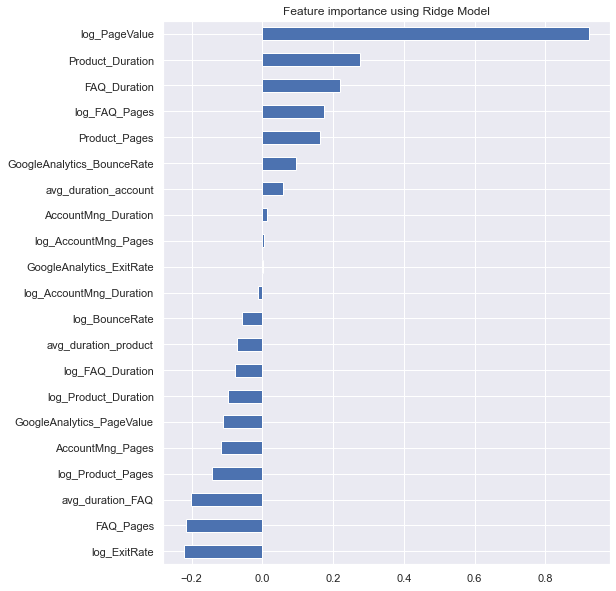

In [99]:
plot_importance(ridge_coefs,'Ridge')

<hr>
<a class="anchor" id="decision_tree_sel_feature">
    
### Decision Tree for feature importance   
</a>

In [100]:
gini_importance = DecisionTreeClassifier().fit(X_train_eng[metric_feat+binary_list], y_train_df).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_eng[metric_feat+binary_list], y_train_df).feature_importances_
gini_importance

array([1.49718020e-02, 2.11963316e-02, 1.00869160e-03, 6.55847302e-03,
       2.51547817e-02, 4.58359881e-02, 6.28960909e-02, 3.84195843e-02,
       3.80967645e-01, 3.01478631e-02, 1.64043841e-02, 5.11659245e-02,
       1.27113489e-02, 1.97756031e-02, 7.14824788e-03, 3.35408611e-04,
       3.53188806e-02, 3.74001854e-02, 1.60396256e-02, 2.65573928e-02,
       1.94350947e-02, 3.94361058e-03, 3.44490794e-03, 0.00000000e+00,
       8.50774791e-03, 2.24411303e-03, 0.00000000e+00, 1.11261740e-03,
       2.77429496e-03, 1.41959291e-03, 0.00000000e+00, 1.15416037e-03,
       0.00000000e+00, 6.57035069e-03, 2.71076529e-03, 2.97633047e-03,
       3.62659652e-03, 5.09870652e-03, 6.03604665e-03, 7.20687386e-03,
       2.89783917e-03, 6.13078250e-04, 7.73524136e-03, 1.11897522e-03,
       0.00000000e+00, 3.57732367e-03, 1.03092975e-03, 8.67827354e-04,
       1.88791747e-03, 9.99085016e-04, 3.86239948e-03, 9.17133925e-04,
       9.59438785e-04, 6.14232743e-03, 1.19121779e-02, 1.58665885e-03,
      

In [101]:
feat_DT=['GoogleAnalytics_PageValue','log_BounceRate','avg_duration_product','log_AccountMng_Pages']

<AxesSubplot:xlabel='Value', ylabel='Col'>

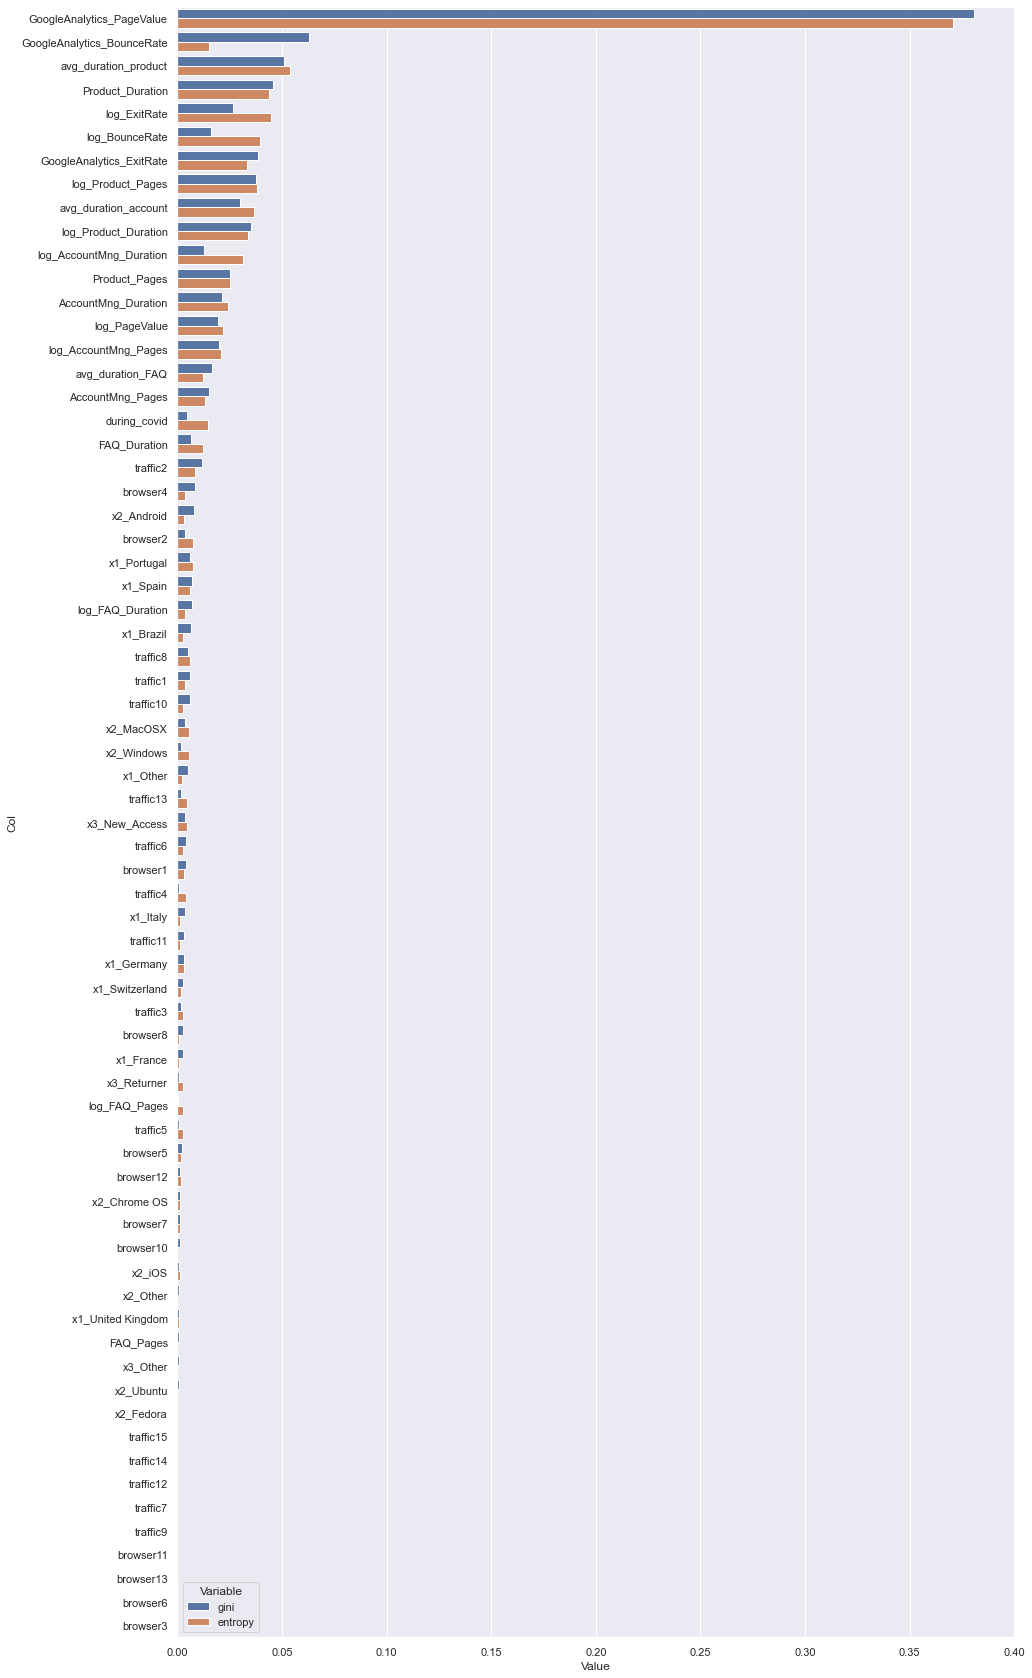

In [102]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_eng[metric_feat+binary_list].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,30))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<hr>
<a class="anchor" id="imbalanced">
    
# Check for an imbalanced dataset
    
</a>

<hr>
<a class="anchor" id="Adaptive">
    
## SMOTENC 
    
</a>

In [103]:
X_train_eng=X_train_eng.drop(non_num_feat,axis=1)
X_val_eng=X_val_eng.drop(non_num_feat,axis=1)

In [104]:
# X_train_RSKF=pd.concat([X_train_eng,y_train_df],axis=1)
# X_val_RSKF=pd.concat([X_val_eng,y_val_df],axis=1)
# data_RSKF=pd.concat([X_train_RSKF,X_val_RSKF],axis=0)


In [105]:
# X_RSKF=data_RSKF.iloc[:,:-1]
# y_RSKF=data_RSKF.iloc[:,-1]

In [106]:
y_val_df=y_val_df.squeeze().to_list()
y_train_df=y_train_df.squeeze().to_list()

In [107]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(sampling_strategy='minority', random_state=0, n_neighbors=5)
# X_train_over, y_train_over = adasyn.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df.to_list())

In [108]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_train_over, y_train_over = smote.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df.to_list())

In [109]:
smote_nc = SMOTENC(categorical_features=range(21,69), random_state=42)
X_train_over, y_train_over = smote_nc.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df)

In [110]:
count1=0
count0=0

for value in y_train_over:
    if value==1:
        count1+=1
    else: count0+=1
        
print(count1,count0)

5698 5698


In [111]:
feat_DT=['GoogleAnalytics_PageValue','log_BounceRate','avg_duration_product','log_AccountMng_Pages']

In [112]:
set1=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic2','during_covid']
set2=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic2','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']
set3=['AccountMng_Pages','Product_Duration','log_PageValue','x2_MacOSX','x2_Windows','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']

In [113]:
sets=[set1, set2, set3]

X_train_over y_train_over; X_val_eng y_val_df

X_train_eng y_train_df; X_val_eng y_val_df

In [114]:
def metrics1(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print('Confusion Matrix:')
    print(confusion_matrix(y_val, pred_val))

## Strafified kfold

In [115]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [116]:
rsk=RepeatedStratifiedKFold(n_splits=10, n_repeats=2)

<hr>
<a class="anchor" id="DT">
    
## Decision Tree
    
</a>

In [78]:
# feat_DT=['log_PageValue','log_BounceRate','avg_duration_product','Product_Pages','log_AccountMng_Pages','during_covid']

X_train_over y_train_over; X_val_eng y_val_df

# DT WITHOUT OVERSAMPLING

X_train_eng y_train_df

In [100]:
min_samples_split=[200,300,350,400,450,500,550,600]

In [117]:
for i in min_samples_split:
    print('set: '+str(i))
    dt = DecisionTreeClassifier(splitter = 'random',class_weight={0:1,1:5.6}, min_samples_split=i, criterion='gini').fit(X_train_eng[set2], y_train_df)
    metrics1(y_train_df, dt.predict(X_train_eng[set2]) , y_val_df, dt.predict(X_val_eng[set2]))

set: 200
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5698
           1       0.55      0.82      0.66      1010

    accuracy                           0.87      6708
   macro avg       0.76      0.85      0.79      6708
weighted avg       0.90      0.87      0.88      6708

Confusion Matrix:
[[5031  667]
 [ 185  825]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2436
           1       0.58      0.81      0.67       426

    accuracy                           0.88      2862
   macro avg       0.77      0.85      0.80      2862
weighted avg       0.91      0.88      0.89      2862

Confusion Matrix:
[[2185  251]
 [  83  343]]


In [140]:
dt = DecisionTreeClassifier(splitter = 'random', min_samples_split=400,class_weight={0:1,1:5.6}, criterion='gini',random_state=4).fit(X_train_eng[set1], y_train_df)

In [141]:
metrics1(y_train_df, dt.predict(X_train_eng[set1]), y_val_df, dt.predict(X_val_eng[set1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5698
           1       0.55      0.82      0.66      1010

    accuracy                           0.87      6708
   macro avg       0.76      0.85      0.79      6708
weighted avg       0.90      0.87      0.88      6708

Confusion Matrix:
[[5014  684]
 [ 183  827]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [142]:
roc_dt=roc_auc_score(y_val_df,  dt.predict(X_val_eng[set1]))
roc_dt

0.8530319850135295

In [86]:
def run_model_DT(X,y):
    model=DecisionTreeClassifier(splitter = 'random', min_samples_split=450, criterion='gini',random_state=4).fit(X_train_eng[set1], y_train_df)
    return model

In [87]:
def evaluate_model(X,y, model):
    predictions = dt.predict(X)
    return f1_score(y, predictions,average="micro")

In [88]:
def avg_score_DT(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_DT(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [89]:
DT_SCORE=avg_score_DT(rsk,X_train_eng[set1], y_val_df)
DT_SCORE

TypeError: Singleton array array(None, dtype=object) cannot be considered a valid collection.

In [131]:
labels_DT = dt.predict(X_test_eng[set1])

In [132]:
labels_DT

array([0, 0, 0, ..., 1, 0, 0])

In [133]:
labels_DT_df = pd.DataFrame(labels_DT)

In [134]:
kaggle_DT = pd.DataFrame(X_test_eng.index)
kaggle_DT

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [135]:
kaggle_DT = pd.concat([kaggle_DT["Access_ID"], labels_DT_df[0]],axis=1)
kaggle_DT["Buy"] = kaggle_DT[0]
kaggle_DT = kaggle_DT.drop(columns=[0])

In [136]:
kaggle_DT.set_index('Access_ID',inplace=True,drop=True)

In [137]:
kaggle_DT.value_counts()

Buy
0      1792
1       508
dtype: int64

In [138]:
kaggle_DT=kaggle_DT.astype(int)

In [139]:
file_name = 'kagGleDT.csv'
  
# saving the excel
kaggle_DT.to_csv(file_name)

# DT WITH OVERSAMPLING

In [88]:
for i in depth_dt:
    print('set: '+str(i))
    dt_over = DecisionTreeClassifier(splitter = 'random', min_samples_split=i, criterion='gini').fit(X_train_over[set3], y_train_over)
    metrics1(y_train_over, dt_over.predict(X_train_over[set3]) , y_val_df, dt_over.predict(X_val_eng[set3]))

set: 200
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5698
           1       0.86      0.86      0.86      5698

    accuracy                           0.86     11396
   macro avg       0.86      0.86      0.86     11396
weighted avg       0.86      0.86      0.86     11396

Confusion Matrix:
[[4897  801]
 [ 807 4891]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

[[5036  662]
 [1011 4687]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2436
           1       0.57      0.81      0.67       426

    accuracy                           0.88      2862
   macro avg       0.77      0.85      0.80      2862
weighted avg       0.91      0.88      0.89      2862

Confusion Matrix:
[[2179  257]
 [  82  344]]


In [106]:
dt_over = DecisionTreeClassifier(splitter = 'random',criterion='gini',min_samples_split=400,random_state=42).fit(X_train_over[set3], y_train_over)

In [107]:
metrics1(y_train_over, dt_over.predict(X_train_over[set3]) , y_val_df, dt_over.predict(X_val_eng[set3]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5698
           1       0.88      0.82      0.85      5698

    accuracy                           0.85     11396
   macro avg       0.86      0.85      0.85     11396
weighted avg       0.86      0.85      0.85     11396

Confusion Matrix:
[[5057  641]
 [1018 4680]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

<hr>
<a class="anchor" id="RF">
    
## Random Forest
    
</a>

In [143]:
sets_RF=list(set(X_train_eng.columns.to_list()) & set(X_val_eng.columns.to_list()) & set(metric_feat+binary_list))
sets_RF1=set(metric_feat) | set(set1) |set(set2)|set(set3)

In [158]:
sets_RF1

{'AccountMng_Duration',
 'AccountMng_Pages',
 'FAQ_Duration',
 'FAQ_Pages',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'Product_Duration',
 'Product_Pages',
 'avg_duration_FAQ',
 'avg_duration_account',
 'avg_duration_product',
 'during_covid',
 'log_AccountMng_Duration',
 'log_AccountMng_Pages',
 'log_BounceRate',
 'log_ExitRate',
 'log_FAQ_Duration',
 'log_FAQ_Pages',
 'log_PageValue',
 'log_Product_Duration',
 'log_Product_Pages',
 'traffic2',
 'x2_MacOSX',
 'x2_Windows',
 'x3_New_Access'}

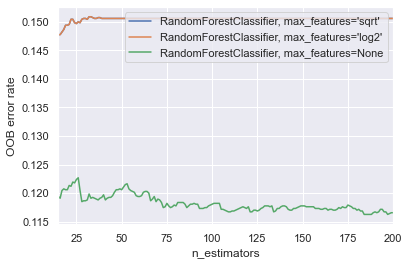

In [224]:
# adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html 
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42


ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
            min_samples_leaf=700
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=700
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=700
            
        ),
    ),
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_eng[set1], y_train_df)
        
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [146]:
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'",
              [(15, 0.1292486583184258),
               (16, 0.12895050685748355),
               (17, 0.12954680977936794),
               (18, 0.12880143112701248),
               (19, 0.12805605247465712),
               (20, 0.12731067382230177),
               (21, 0.12805605247465712),
               (22, 0.1271615980918307),
               (23, 0.12805605247465712),
               (24, 0.12775790101371498),
               (25, 0.12805605247465712),
               (26, 0.12880143112701248),
               (27, 0.12805605247465712),
               (28, 0.12835420393559926),
               (29, 0.1282051282051282),
               (30, 0.12835420393559926),
               (31, 0.12909958258795473),
               (32, 0.13014311270125223),
               (33, 0.1292486583184258),
               (34, 0.12850327966607034),
               (35, 0.12939773404889687),
               (36, 0.12895050685748355),
               (37,

In [95]:
# n_estimators_list=[50,75,100,125,150,175,200,225,250,275,300]
# error_rate=[]
# for i in n_estimators_list:
#     clf=RandomForestClassifier(n_estimators=i,criterion="gini", max_features=None, min_samples_leaf=500,oob_score=True,warm_start=True)


#     clf.fit(X_train_eng[sets_RF], y_train_df)

#     y_pred=clf.predict(X_val_eng[sets_RF])
#     metrics1(y_train_df, clf.predict(X_train_eng[sets_RF]) , y_val_df, y_pred)
#     error_rate.append(clf.oob_score_)


In [210]:
clf=RandomForestClassifier(n_estimators=150,criterion="gini", max_features=None, min_samples_leaf=500,random_state=42)
clf.fit(X_train_eng[set1], y_train_df)

RandomForestClassifier(max_features=None, min_samples_leaf=500,
                       n_estimators=150, random_state=42)

In [211]:
metrics1(y_train_df, clf.predict(X_train_eng[set1]) , y_val_df, clf.predict(X_val_eng[set1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5698
           1       0.60      0.72      0.66      1010

    accuracy                           0.89      6708
   macro avg       0.78      0.82      0.79      6708
weighted avg       0.90      0.89      0.89      6708

Confusion Matrix:
[[5220  478]
 [ 284  726]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [212]:
roc_auc_score(y_val_df, clf.predict(X_val_eng[set1]))

0.8205352806494138

In [215]:
labels_RF = clf.predict(X_test_eng[set1])

In [216]:
labels_RF

array([0, 0, 0, ..., 1, 0, 0])

In [217]:
labels_RF_df = pd.DataFrame(labels_RF)

In [218]:
kaggle_RF = pd.DataFrame(X_test_eng.index)
kaggle_RF

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [219]:
kaggle_RF = pd.concat([kaggle_RF["Access_ID"], labels_RF_df[0]],axis=1)
kaggle_RF["Buy"] = kaggle_RF[0]
kaggle_RF = kaggle_RF.drop(columns=[0])

In [220]:
kaggle_RF.set_index('Access_ID',inplace=True,drop=True)

In [221]:
kaggle_RF.value_counts()

Buy
0      1903
1       397
dtype: int64

In [222]:
kaggle_RF=kaggle_RF.astype(int)

In [223]:
file_name = 'kagGleRF.csv'
  
# saving the excel
kaggle_RF.to_csv(file_name)

<hr>
<a class="anchor" id="VC">
    
## Voting Classifier
    
</a>

In [278]:
set2_new=set2.copy()
set2_new.remove('traffic2')
set2_new.remove('x3_New_Access')

In [313]:
# from set2 remove binary variables

estimators = [('dt', DecisionTreeClassifier(splitter = 'random',class_weight={0:1,1:5.6},min_samples_split=350, criterion='gini',random_state=2)), 
              ('dt1', DecisionTreeClassifier(splitter = 'random',min_samples_split=200, criterion='gini',random_state=2)), 
              ('dt2', DecisionTreeClassifier(splitter = 'random',min_samples_split=300, criterion='gini',random_state=2)),
              ('dt3', DecisionTreeClassifier(splitter = 'random',min_samples_split=350, criterion='gini',random_state=2)),
             
              ('knn1',KNeighborsClassifier(n_neighbors=5)),
              ('knn3',KNeighborsClassifier(n_neighbors=4)),
              ('knn4',KNeighborsClassifier(n_neighbors=3))]


vot_hard = VotingClassifier(estimators = estimators, voting ='hard') 
vot_hard = vot_hard.fit(X_train_eng[set2_new], y_train_df) 
metrics1(y_train_df, vot_hard.predict(X_train_eng[set2_new]) , y_val_df, vot_hard.predict(X_val_eng[set2_new]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5698
           1       0.76      0.66      0.70      1010

    accuracy                           0.92      6708
   macro avg       0.85      0.81      0.83      6708
weighted avg       0.91      0.92      0.91      6708

Confusion Matrix:
[[5483  215]
 [ 346  664]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [314]:
f1_score(y_val_df,vot_hard.predict(X_val_eng[set2_new]),average='micro')

0.9025157232704403

In [315]:
vot_soft = VotingClassifier(estimators = estimators, voting ='soft') 
vot_soft = vot_soft.fit(X_train_eng[set2_new], y_train_df) 
metrics1(y_train_df, vot_soft.predict(X_train_eng[set2_new]) , y_val_df, vot_hard.predict(X_val_eng[set2_new]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5698
           1       0.73      0.72      0.72      1010

    accuracy                           0.92      6708
   macro avg       0.84      0.83      0.84      6708
weighted avg       0.92      0.92      0.92      6708

Confusion Matrix:
[[5431  267]
 [ 287  723]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [316]:
roc_auc_score(y_val_df, vot_hard.predict(X_val_eng[set2_new]))

0.7674437429172738

In [317]:
roc_auc_score(y_val_df, vot_soft.predict(X_val_eng[set2_new]))

0.78308644973288

In [318]:
labels_VC=vot_soft.predict(X_test_eng[set1])

In [319]:
labels_VC

array([0, 0, 0, ..., 1, 0, 0])

In [320]:
labels_VC = pd.DataFrame(labels_VC)

In [321]:
kaggle_VC = pd.DataFrame(X_test_eng.index)
kaggle_VC

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [322]:
kaggle_VC = pd.concat([kaggle_VC["Access_ID"], labels_VC[0]],axis=1)
kaggle_VC["Buy"] = kaggle_VC[0]
kaggle_VC = kaggle_VC.drop(columns=[0])

In [323]:
kaggle_VC.set_index('Access_ID',inplace=True,drop=True)

In [324]:
kaggle_VC.value_counts()

Buy
0      1979
1       321
dtype: int64

In [325]:
kaggle_VC=kaggle_VC.astype(int)

In [326]:
file_name = 'kagGleVC.csv'
  
# saving the excel
kaggle_VC.to_csv(file_name)

<hr>
<a class="anchor" id="NN">
    
## Neural Network
    
</a>

In [101]:
from sklearn.model_selection import StratifiedKFold
import time

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
X_train_eng[set1].dtypes

AccountMng_Pages    float64
Product_Duration    float64
log_PageValue       float64
x3_New_Access       float64
traffic2            float64
during_covid          int32
dtype: object

In [105]:
print(len(set1), len(set2), len(set3))

6 8 8


In [147]:
for i in range(len(sets)):
    
    print(f'Scores using Set {i+1}')

    neural_network = MLPClassifier(max_iter=1000).fit(X_train_eng[sets[i]], y_train_df)
    
    predictions_train = neural_network.predict(X_train_eng[sets[i]])
    predictions_val = neural_network.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_df, predictions_train , y_val_df, predictions_val)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5698
           1       0.69      0.58      0.63      1010

    accuracy                           0.90      6708
   macro avg       0.81      0.77      0.79      6708
weighted avg       0.89      0.90      0.89      6708

Confusion Matrix:
[[5441  257]
 [ 425  585]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# Oversampling

In [145]:
for i in range(len(sets)):
    
    print(f'Scores using Set {i+1}')

    neural_network = MLPClassifier(hidden_layer_sizes = 2).fit(X_train_over[sets[i]], y_train_over)
    
    predictions_train_over = neural_network.predict(X_train_over[sets[i]])
    predictions_val_over = neural_network.predict(X_val_eng[sets[i]])

    metrics1(y_train_over, predictions_train_over , y_val_df, predictions_val_over)

Scores using Set 1


NameError: name 'MLPClassifier' is not defined

In [179]:
neural_network = MLPClassifier(max_iter = 1000).fit(X_train_over[set3], y_train_over)

In [180]:
metrics1(y_train_over, neural_network.predict(X_train_over[set3]), y_val_df, neural_network.predict(X_val_eng[set3]))

AttributeError: 'list' object has no attribute 'squeeze'

In [181]:
labels_NN_over = neural_network.predict(X_test_eng[set3])

In [182]:
labels_NN_df_over = pd.DataFrame(labels_NN_over)

In [183]:
kaggle_NN = pd.DataFrame(X_test_eng.index)
kaggle_NN

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [184]:
kaggle_NN_over = pd.concat([kaggle_NN["Access_ID"], labels_NN_df_over[0]],axis=1)
kaggle_NN_over["Buy"] = kaggle_NN_over[0]
kaggle_NN_over = kaggle_NN_over.drop(columns=[0])

In [185]:
kaggle_NN_over.set_index('Access_ID',inplace=True,drop=True)

In [186]:
kaggle_NN_over.value_counts()

Buy
0      1835
1       465
dtype: int64

In [187]:
kaggle_NN_over = kaggle_NN_over.astype(int)

In [188]:
file_name = 'kagGleNN_over.csv'
  
# saving the excel
kaggle_NN_over.to_csv(file_name)

No oversampling

In [189]:
neural_network_reg = MLPClassifier().fit(X_train_eng[set3], y_train_df['Buy'].astype('float64'))

TypeError: list indices must be integers or slices, not str

In [190]:
metrics1(y_train_df['Buy'].astype('float64'), neural_network.predict(X_train_eng[set3]) , y_val_df.squeeze().to_list(), neural_network.predict(X_val_eng[set3]))

TypeError: list indices must be integers or slices, not str

In [191]:
labels_NN_reg = neural_network_reg.predict(X_test_eng[set3])

NameError: name 'neural_network_reg' is not defined

In [192]:
labels_NN_df_reg = pd.DataFrame(labels_NN_reg)
labels_NN_df_reg

NameError: name 'labels_NN_reg' is not defined

In [193]:
kaggle_NN_reg = pd.DataFrame(X_test_eng.index)
kaggle_NN_reg

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [194]:
kaggle_NN_reg = pd.concat([kaggle_NN_reg["Access_ID"], labels_NN_df_reg[0]],axis=1)
kaggle_NN_reg["Buy"] = kaggle_NN_reg[0]
kaggle_NN_reg = kaggle_NN_reg.drop(columns=[0])

NameError: name 'labels_NN_df_reg' is not defined

In [195]:
kaggle_NN_reg.set_index('Access_ID',inplace=True,drop=True)

In [196]:
kaggle_NN_over.value_counts()

Buy
0      1835
1       465
dtype: int64

In [197]:
kaggle_NN_reg = kaggle_NN_reg.astype(int)

In [198]:
file_name = 'kagGleNN_reg.csv'
  
# saving the excel
kaggle_NN_reg.to_csv(file_name)

<hr>
<a class="anchor" id="LR">
    
## Logistic Regression
    
</a>

### Without oversampling

In [327]:
from sklearn.linear_model import LogisticRegression

In [334]:
log_model = LogisticRegression()

for i in range(len(sets)):
    
    print(f'Scores using Set {i+1}')

    logistic_regression = LogisticRegression().fit(X_train_eng[sets[i]], y_train_df)
    
    predict_train_log = logistic_regression.predict(X_train_eng[sets[i]])
    predict_val_log = logistic_regression.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_df, predict_train_log , y_val_df, predict_val_log)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5698
           1       0.68      0.52      0.59      1010

    accuracy                           0.89      6708
   macro avg       0.80      0.74      0.76      6708
weighted avg       0.88      0.89      0.88      6708

Confusion Matrix:
[[5446  252]
 [ 483  527]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [335]:
logistic_regression = LogisticRegression().fit(X_train_eng[set3], y_train_df)
labels_logistic_reg = logistic_regression.predict(X_test_eng[set3])
df_logistic_reg = pd.DataFrame(labels_logistic_reg)
df_logistic_reg

0
0     0
1     0
2     0
3     0
4     0
...  ..
2295  0
2296  0
2297  0
2298  0
2299  0

[2300 rows x 1 columns]

In [336]:
roc_log=roc_auc_score(y_val_df,  logistic_regression.predict(X_val_eng[set3]))
roc_log

0.7554695992044218

In [337]:
df_logistic_reg.value_counts()

0    2037
1     263
dtype: int64

In [227]:
kaggle_logistic_reg1 = pd.DataFrame(X_test_eng.index)
kaggle_logistic_reg1

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [228]:
kaggle_logistic_reg1 = pd.concat([kaggle_logistic_reg1["Access_ID"], df_logistic_reg[0]],axis = 1)
kaggle_logistic_reg1["Buy"] = kaggle_logistic_reg1[0]
kaggle_logistic_reg1 = kaggle_logistic_reg1.drop(columns = [0])
kaggle_logistic_reg1.set_index('Access_ID', inplace = True,drop = True)
kaggle_logistic_reg1

Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    0
...        ...
962042726    0
962063064    0
962147749    0
962182167    0
962218682    0

[2300 rows x 1 columns]

In [229]:
kaggle_logistic_reg1 = kaggle_logistic_reg1.astype(int)
file_name = 'kaggle_logistic_no_over.csv'
  
# saving the excel
kaggle_logistic_reg1.to_csv(file_name)

## Oversampling

In [148]:
for i in range(len(sets)):
    
    print(f'Scores using Set {i+1}')

    log_reg_over = LogisticRegression().fit(X_train_over[sets[i]], y_train_over)
    
    predict_train_log_over = log_reg_over.predict(X_train_over[sets[i]])
    predict_val_log_over = log_reg_over.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_over, predict_train_log_over, y_val_df, predict_val_log_over)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5698
           1       0.88      0.79      0.83      5698

    accuracy                           0.84     11396
   macro avg       0.84      0.84      0.84     11396
weighted avg       0.84      0.84      0.84     11396

Confusion Matrix:
[[5088  610]
 [1209 4489]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [150]:
logistic_reg_over = LogisticRegression().fit(X_train_over[set1], y_train_over)
metrics1(y_train_over, logistic_reg_over.predict(X_train_over[set1]), y_val_df, logistic_reg_over.predict(X_val_eng[set1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5698
           1       0.88      0.79      0.83      5698

    accuracy                           0.84     11396
   macro avg       0.84      0.84      0.84     11396
weighted avg       0.84      0.84      0.84     11396

Confusion Matrix:
[[5088  610]
 [1209 4489]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [208]:
labels_log_reg_over = logistic_reg_over.predict(X_test_eng[set1])
df_logistic_reg_over = pd.DataFrame(labels_log_reg_over)
df_logistic_reg_over

0
0     0
1     0
2     0
3     0
4     0
...  ..
2295  1
2296  0
2297  1
2298  0
2299  0

[2300 rows x 1 columns]

In [209]:
df_logistic_reg_over.value_counts()

0    1820
1     480
dtype: int64

In [210]:
kaggle_log_reg_over = pd.DataFrame(X_test_eng.index)
kaggle_log_reg_over

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [211]:
kaggle_log_reg_over = pd.concat([kaggle_log_reg_over["Access_ID"], df_logistic_reg_over[0]],axis = 1)
kaggle_log_reg_over["Buy"] = kaggle_log_reg_over[0]
kaggle_log_reg_over = kaggle_log_reg_over.drop(columns = [0])
kaggle_log_reg_over.set_index('Access_ID', inplace = True,drop = True)
kaggle_log_reg_over

Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    0
...        ...
962042726    1
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [212]:
kaggle_log_reg_over = kaggle_log_reg_over.astype(int)
file_name = 'kaggle_logistic_over.csv'
  
# saving the excel
kaggle_log_reg_over.to_csv(file_name)

<hr>
<a class="anchor" id="SVM">
    
## Support Vector Machines 
    
</a>

In [118]:
from sklearn.svm import SVC

In [341]:
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']

for index, value in enumerate(kernel_type):
    print('***********************************************************')
    print(f'               Kernel choosen: {value}                    ')
    print('***********************************************************')
    for i in range(len(sets)):
        
        print(f'Scores using Set {i+1}')

        svm_no_over = SVC(kernel = value).fit(X_train_eng[sets[i]], y_train_df)
        
        predict_train_svm = svm_no_over.predict(X_train_eng[sets[i]])
        predict_val_svm = svm_no_over.predict(X_val_eng[sets[i]])
        
        
        metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

***********************************************************
               Kernel choosen: linear                    
***********************************************************
Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5698
           1       0.65      0.63      0.64      1010

    accuracy                           0.89      6708
   macro avg       0.79      0.79      0.79      6708
weighted avg       0.89      0.89      0.89      6708

Confusion Matrix:
[[5358  340]
 [ 369  641]]
___________________________________________________________________________________________________________

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5698
           1       0.70      0.54      0.61      1010

    accuracy                           0.90      6708
   macro avg       0.81      0.75      0.78      6708
weighted avg       0.89      0.90      0.89      6708

Confusion Matrix:
[[5467  231]
 [ 465  545]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

Rbf seems to be the Kernel that gives us better results. Let's decide then what is the dataset with best results in this model, using kernel = 'Rbf'

In [ ]:
for i in range(len(sets)):
        
    print(f'Scores using Set {i+1}')

    svm_no_over = SVC(kernel = 'rbf').fit(X_train_eng[sets[i]], y_train_df)
    
    predict_train_svm = svm_no_over.predict(X_train_eng[sets[i]])
    predict_val_svm = svm_no_over.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5698
           1       0.70      0.54      0.61      1010

    accuracy                           0.90      6708
   macro avg       0.81      0.75      0.78      6708
weighted avg       0.89      0.90      0.89      6708

Confusion Matrix:
[[5467  231]
 [ 465  545]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

Set2 seems to be the set of variables with better results

In [347]:
svm_no_over = SVC(kernel = 'rbf').fit(X_train_eng[set3], y_train_df)
predict_train_svm = svm_no_over.predict(X_train_eng[set3])
predict_val_svm = svm_no_over.predict(X_val_eng[set3])
 
metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5698
           1       0.71      0.56      0.63      1010

    accuracy                           0.90      6708
   macro avg       0.82      0.76      0.79      6708
weighted avg       0.89      0.90      0.90      6708

Confusion Matrix:
[[5467  231]
 [ 440  570]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [348]:
labels_svm = svm_no_over.predict(X_test_eng[set3])
df_svm = pd.DataFrame(labels_svm)
df_svm

0
0     0
1     0
2     0
3     0
4     0
...  ..
2295  0
2296  0
2297  1
2298  0
2299  0

[2300 rows x 1 columns]

In [349]:
roc_svm = roc_auc_score(y_val_df,  svm_no_over.predict(X_val_eng[set3]))
roc_svm

0.7665909248595018

In [350]:
df_svm.value_counts()

0    2037
1     263
dtype: int64

In [351]:
kaggle_svm = pd.DataFrame(X_test_eng.index)
kaggle_svm

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [352]:
kaggle_svm = pd.concat([kaggle_svm["Access_ID"], df_svm[0]],axis = 1)
kaggle_svm["Buy"] = kaggle_svm[0]
kaggle_svm = kaggle_svm.drop(columns = [0])
kaggle_svm.set_index('Access_ID', inplace = True,drop = True)
kaggle_svm

Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    0
...        ...
962042726    0
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [ ]:
kaggle_svm = kaggle_svm.astype(int)
file_name = 'kaggle_svm_no_over_rbf.csv'

# saving the excel
kaggle_svm.to_csv(file_name)

#### Grid search

In [119]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid_result = grid.fit(X_train_eng[set2], y_train_df)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, k

In [120]:
svm_no_over_gs = SVC(C = 100, gamma = 1, kernel = 'rbf').fit(X_train_eng[set2], y_train_df)
predict_train_svm_gs = svm_no_over_gs.predict(X_train_eng[set3])
predict_val_svm_gs = svm_no_over_gs.predict(X_val_eng[set3])
 
metrics1(y_train_df, predict_train_svm_gs , y_val_df, predict_val_svm_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5698
           1       0.68      0.59      0.63      1010

    accuracy                           0.90      6708
   macro avg       0.80      0.77      0.78      6708
weighted avg       0.89      0.90      0.89      6708

Confusion Matrix:
[[5415  283]
 [ 417  593]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

### KNN

In [122]:
#Dropping unnecessary variables
knn_features = set3

#Oversampled X alteration       
X_train_over_knn = X_train_over[knn_features]
X_val_eng_knn = X_val_eng[knn_features]

#Non-oversampled X alteration
X_train_eng_knn = X_train_eng[knn_features]
X_val_eng_knn = X_val_eng[knn_features]

In [ ]:
#GridSearch for oversampled data


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='micro')

grid_params = {
    "n_neighbors": np.arange(1,16,2),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "brute", "ball_tree"],
    "metric": ["euclidean", "manhattan"],
    "leaf_size": [1,2,3,4,5,6,7,8]
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs= -1,
    scoring = f1
)

gs_results = gs.fit(X_train_over_knn, y_train_over)

print("****************************************************")
print(f"Best Score:{gs_results.best_score_}")
print("****************************************************")
print(f"Best Results:{gs_results.best_params_}")
print("****************************************************")
print(f"Scorer:{gs_results.scorer_}")

In [ ]:
#GridSearch for non_oversampled data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



f1 = make_scorer(f1_score , average='micro')

grid_params = {
    "n_neighbors": np.arange(1,16,2),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "brute", "ball_tree"],
    "metric": ["euclidean", "manhattan"],
    "leaf_size": [1,2,3,4,5,6,7,8]
}

gs_1 = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs= -1,
    scoring = f1
)

gs_1_results = gs_1.fit(X_train_eng_knn, y_train_df)

print("****************************************************")
print(f"Best Score:{gs_1_results.best_score_}")
print("****************************************************")
print(f"Best Results:{gs_1_results.best_params_}")
print("****************************************************")
print(f"Scorer:{gs_1_results.scorer_}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
****************************************************
Best Score:0.7723624401551206
****************************************************
Best Results:{'algorithm': 'kd_tree', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
****************************************************
Scorer:make_scorer(f1_score, average=macro)


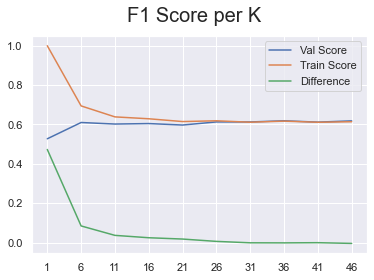

In [220]:
#Creating model based on results from GridSearch

# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


nKrange = np.arange(1,50,5)

val_score_list = []
train_score_list = []
difference_list = []

for k in nKrange:
    # instantiate the model
    knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=5, metric='euclidean',n_neighbors=k)

    # fit the model to the training set
    knn.fit(X_train_over_knn, y_train_over)

    #Predicting values
    y_pred_val = knn.predict(X_val_eng_knn)
    y_pred_train = knn.predict(X_train_eng_knn)

    #F1 Scores 
    val_score = f1_score(y_val_df, y_pred_val)
    train_score = f1_score(y_train_df, y_pred_train)
    difference = train_score - val_score

    #Appending to lists
    val_score_list.append(val_score)
    train_score_list.append(train_score)
    difference_list.append(difference)

fig = plt.figure()
fig.suptitle('F1 Score per K', fontsize=20)
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(nKrange, val_score_list, label = 'Val Score')
plt.plot(nKrange, train_score_list, label = 'Train Score')
plt.plot(nKrange, difference_list, label = "Difference")
plt.xticks(nKrange)
plt.legend()
plt.show()

In [222]:
null_accuracy = (2436/(426+2436))
print(f"Null Accuracy Score: {round(null_accuracy,4)}")

Null Accuracy Score: 0.8512


In [224]:
#Instantiating final model
final_knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='manhattan',n_neighbors=26)

#Fitting model
final_knn.fit(X_train_over_knn, y_train_over)

#Creating prediction on validation set
y_pred_11 = final_knn.predict(X_val_eng_knn)

#Printing score
print("F1 Score: " + str(round(f1_score(y_val_df, y_pred_val),4)))


F1 Score: 0.618


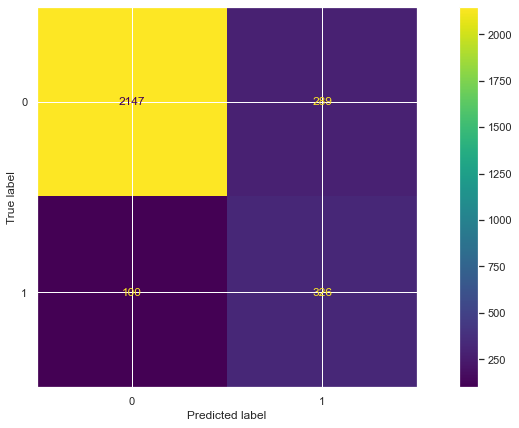

In [226]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_knn, X_val_eng_knn, y_val_df)

In [228]:
from sklearn.metrics import classification_report

print(classification_report(y_val_df, y_pred_11))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2436
           1       0.53      0.77      0.63       426

    accuracy                           0.86      2862
   macro avg       0.74      0.82      0.77      2862
weighted avg       0.89      0.86      0.87      2862



In [229]:
#Making predictions on the Test Data

labels_KNN = final_knn.predict(X_test_eng[set3])
labels_KNN

array([0, 0, 0, ..., 1, 0, 0])

In [230]:
labels_KNN_df = pd.DataFrame(labels_KNN)
labels_KNN_df

0
0     0
1     0
2     0
3     0
4     1
...  ..
2295  1
2296  0
2297  1
2298  0
2299  0

[2300 rows x 1 columns]

In [231]:
kaggle_KNN = pd.DataFrame(X_test_eng.index)
kaggle_KNN

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [232]:
kaggle_KNN = pd.concat([kaggle_KNN["Access_ID"], labels_KNN_df[0]],axis=1)
kaggle_KNN["Buy"] = kaggle_KNN[0]
kaggle_KNN = kaggle_KNN.drop(columns=[0])

In [233]:
kaggle_KNN.set_index('Access_ID',inplace=True,drop=True)

In [234]:
kaggle_KNN=kaggle_KNN.astype(int)
kaggle_KNN

Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    1
...        ...
962042726    1
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [235]:
kaggle_KNN.to_csv("kaggleKNN.csv")

In [ ]:
adaboost - FILIPA
gradient bosting classifier - LEO
StackingClassifier - DANIEL
VotingClassifier - HELENA

comparing scales - KNN;LOG - leonor - (neural networks part 1)

<hr>
<a class="anchor" id="SVM">
    
## Adaboost 
    
</a>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
for i in range(len(sets)):
        
    print(f'Scores using Set {i+1}')

    adaboost_no_over = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train_eng[sets[i]], y_train_df)
    
    predict_train_adaboost = adaboost_no_over.predict(X_train_eng[sets[i]])
    predict_val_adaboost = adaboost_no_over.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)


Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5698
           1       0.65      0.58      0.61      1010

    accuracy                           0.89      6708
   macro avg       0.79      0.76      0.77      6708
weighted avg       0.89      0.89      0.89      6708

Confusion Matrix:
[[5387  311]
 [ 427  583]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
adaboost_no_over = AdaBoostClassifier(n_estimators=50, learning_rate=1).fit(X_train_eng[set2], y_train_df)
predict_train_adaboost = adaboost_no_over.predict(X_train_eng[set2])
predict_val_adaboost = adaboost_no_over.predict(X_val_eng[set2])

metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5698
           1       0.66      0.58      0.62      1010

    accuracy                           0.89      6708
   macro avg       0.79      0.76      0.78      6708
weighted avg       0.89      0.89      0.89      6708

Confusion Matrix:
[[5398  300]
 [ 425  585]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
labels_adaboost = adaboost_no_over.predict(X_test_eng[set2])
df_adaboost = pd.DataFrame(labels_adaboost)
df_adaboost

0
0     0
1     0
2     0
3     0
4     0
...  ..
2295  0
2296  0
2297  1
2298  0
2299  0

[2300 rows x 1 columns]

In [ ]:
roc_adaboost = roc_auc_score(y_val_df,  adaboost_no_over.predict(X_val_eng[set2]))
roc_adaboost

0.76741772473924

In [ ]:
df_adaboost.value_counts()

0    1992
1     308
dtype: int64

In [ ]:
kaggle_adaboost = pd.DataFrame(X_test_eng.index)
kaggle_adaboost

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [ ]:
kaggle_adaboost = pd.concat([kaggle_adaboost["Access_ID"], df_adaboost[0]],axis = 1)
kaggle_adaboost["Buy"] = kaggle_adaboost[0]
kaggle_adaboost = kaggle_adaboost.drop(columns = [0])
kaggle_adaboost.set_index('Access_ID', inplace = True,drop = True)
kaggle_adaboost

Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    0
...        ...
962042726    0
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [ ]:
kaggle_adaboost = kaggle_adaboost.astype(int)
file_name = 'kaggle_adaboost_no_over.csv'

# saving the excel
kaggle_adaboost.to_csv(file_name)

#### Exploring the number of trees in Adaboost (n_estimates)

>10 0.880 (0.014)
>50 0.885 (0.014)
>100 0.884 (0.013)
>500 0.882 (0.014)
>1000 0.881 (0.013)
>5000 0.879 (0.012)


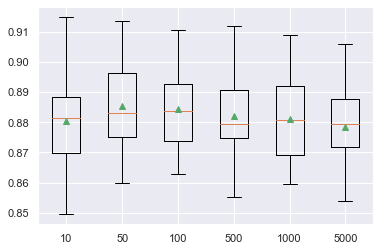

In [ ]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset


# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set2], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

n_estimates = 50 seems to be the optimal

#### Exploring the weak learner in Adaboost (base_estimator)

>1 0.885 (0.014)
>2 0.888 (0.014)
>3 0.881 (0.012)
>4 0.875 (0.012)
>5 0.868 (0.012)
>6 0.873 (0.013)
>7 0.883 (0.013)
>8 0.883 (0.011)
>9 0.884 (0.012)
>10 0.883 (0.012)


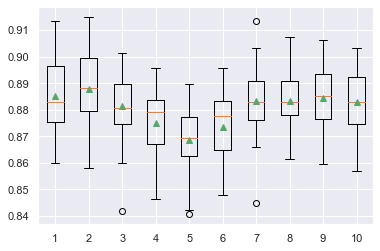

In [ ]:
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set2], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

base_estimator = 2 seems to be optimal

#### Exploring the Learning Rate in Adaboost (learning_rate)

>0.100 0.888 (0.012)
>0.200 0.888 (0.012)
>0.300 0.888 (0.013)
>0.400 0.887 (0.014)
>0.500 0.887 (0.013)
>0.600 0.889 (0.013)
>0.700 0.887 (0.013)
>0.800 0.885 (0.012)
>0.900 0.886 (0.014)
>1.000 0.885 (0.014)
>1.100 0.886 (0.013)
>1.200 0.885 (0.014)
>1.300 0.886 (0.014)
>1.400 0.885 (0.015)
>1.500 0.886 (0.013)
>1.600 0.887 (0.012)
>1.700 0.885 (0.012)
>1.800 0.885 (0.013)
>1.900 0.883 (0.012)
>2.000 0.124 (0.015)


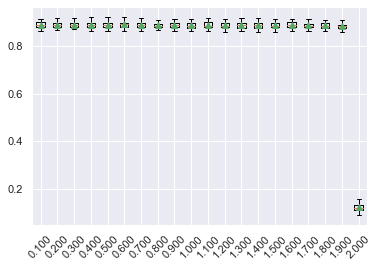

In [ ]:
from numpy import arange
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set2], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

learning_rate = 0.6 seems to be optimal

#### Explore Alternate Algorithm (base_estimator)

In [ ]:
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_eng[set2], y_train_df, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.877 (0.007)


### GridSearch

In [ ]:
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 0.6, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_eng[set2], y_train_df)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.889286 using {'learning_rate': 0.01, 'n_estimators': 100}
0.873533 (0.015625) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.873533 (0.015625) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.873533 (0.015625) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.873533 (0.015625) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.873533 (0.015625) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.873533 (0.015625) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.873533 (0.015625) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.887050 (0.014492) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.873533 (0.015625) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.887050 (0.014492) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.889286 (0.012251) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.887548 (0.011804) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.888093 (0.011719) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.88764

In [ ]:
adaboost_test = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01).fit(X_train_eng[set2], y_train_df)
predict_train_adaboost1 = adaboost_test.predict(X_train_eng[set2])
predict_val_adaboost1 = adaboost_test.predict(X_val_eng[set2])

metrics1(y_train_df, predict_train_adaboost1 , y_val_df, predict_val_adaboost1)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5698
           1       0.64      0.66      0.65      1010

    accuracy                           0.89      6708
   macro avg       0.79      0.80      0.79      6708
weighted avg       0.89      0.89      0.89      6708

Confusion Matrix:
[[5318  380]
 [ 343  667]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
labels_adaboost_gs = adaboost_test.predict(X_test_eng[set2])
df_adaboost_gs = pd.DataFrame(labels_adaboost_gs)
df_adaboost_gs

0
0     0
1     0
2     0
3     0
4     0
...  ..
2295  0
2296  0
2297  1
2298  0
2299  0

[2300 rows x 1 columns]

In [ ]:
roc_adaboost_gs = roc_auc_score(y_val_df, adaboost_test.predict(X_val_eng[set2]))
roc_adaboost_gs

0.7929762482943639

In [ ]:
df_adaboost_gs.value_counts()

0    1958
1     342
dtype: int64

In [ ]:
kaggle_adaboost_gs = pd.DataFrame(X_test_eng.index)
kaggle_adaboost_gs

Access_ID
0     798519314
1     798663101
2     798663221
3     798760918
4     798856982
...         ...
2295  962042726
2296  962063064
2297  962147749
2298  962182167
2299  962218682

[2300 rows x 1 columns]

In [ ]:
kaggle_adaboost_gs = pd.concat([kaggle_adaboost_gs["Access_ID"], df_adaboost_gs[0]],axis = 1)
kaggle_adaboost_gs["Buy"] = kaggle_adaboost_gs[0]
kaggle_adaboost_gs = kaggle_adaboost_gs.drop(columns = [0])
kaggle_adaboost_gs.set_index('Access_ID', inplace = True,drop = True)
kaggle_adaboost_gs

Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    0
...        ...
962042726    0
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [ ]:
kaggle_adaboost_gs = kaggle_adaboost_gs.astype(int)
file_name = 'kaggle_adaboost_gs_no_over.csv'

# saving the excel
kaggle_adaboost_gs.to_csv(file_name)